In [ ]:
%load_ext autoreload
%autoreload 2

# Линейная регрессия

Всем привет. В данном уроке мы разбирем такую тему как линейная регрессия. 

Мы рассмотрим какие виды проблем решает линейная регрессия. А также, мы поговорим про то, как можно использовать математеку для решения этих проблем. 

В этом уроке мы подробно разберем что такое линейные функции, функция потерь, производная и поговорим про один из самый популярный и самых полезный алгорим машинного обучения - градиентный спуск.

Но просто рассматривать теорию без реализации не слишком полезно. Поэтому мы также реализуем все эти функции и алгоритмы на Python и NumPy.

И первый вопрос который мы рассмотрим это - ***почему мы изучаем линейную регрессию, а не глубокие нейронные сети?*** 

Многие из вас наверняка уже слышали про линейную регрессию в университете или в даже в школе. И сейчас вы задаетесь вопросом: а почему мы будем изучать ее, а не что-то что сейчас на слуху, например, нейронные сети. 

Во-первых, линейная регрессия довольно простая для понимания, но при этом, идеи которые мы сегодня рассмотрим на примере линейной регрессии повсеместно применяются в машинном обучении. Например, алгоритм который используется для обучения линейной регрессии также используется и в нейронных сетях, с небольшими доработками.

Во-вторых, пускай линейная регрессия и является довольно старой идеей, она до сих применяется для решения многих зачадах. Она встроена во многие базы данных, такие как ClickHouse и даже доспупна в Excel.

## Данные

### Постановка задачи (доделать)

Давайте представим что к нам пришла фирма, которая хочет по $Х$ определять $У$. У них есть несколько примеров данных где есть пары $х$ и $у$. 

То есть, наша задача найти зависимость между $Х$ и $У$. 

То есть, нужно найти функцию $f(X) = y$, где $X$ это , а $y$ это. В общем случаее это и есть задача регрессии.

Можно представить что эти пары ($x$, $y$) - это значения функции $f(X)$ в точках $Х$. И задача регрессии это построить функцию (некую линию) которая может *описать* эти данные. 

Например: 

*нам говорят, у Х=0.1. Мы берем это число, помещаем ее нашу функцию и получаем значение для у.* 

$f(0.1) = 0.3$

*И мы говорим в ответ: у=0.3.*

*Другой пример регрессии.* У нас есть интернет сайт и мы хотим предсказать сколько посититлей у нас будет в в определенное время, при этом у нас есть статистика посещений сайта от времени. Наша задача - используя имеющиеся данные о загруженности в прошлом, предсказать количество поситителей в интересующиее нас время. 

То есть по имеющимся данным построить зависимость интересующией нас переменной от каких то других параметров.

В общем случае задача регрессии - это по входным данным найти число в каком-то *непрерывном* диапазоне. Например: $(-1, 1)$ или же $R$.

Рассмотрим подробнее пример с Х и У.

Давайте загрузим данные. Для этого воспользуемся функциями которые я подготовил специально для этого урока. 

В первой строчке мы подгрузим все вспомогательные функции, которые мы сегодня будем применять. 

Вторая строчка подгужает библиотеку NumPy, c помощью которой мы будем сегодня реализовывать все алгоримты. 

В третьей строки мы загрузим данные.

In [5]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

После этого в векторе $X$, а в векторе $y$. 

А теперь давайте посмотрим на эти данные.

In [6]:
visualize_Xy(X, y)    

    Значение X  Значение Y
0         0.10        0.14
1         0.15        0.19
2         0.15        0.16
3         0.18        0.14
4         0.19        0.17
5         0.22        0.23
6         0.25        0.20
7         0.29        0.28
8         0.30        0.25
9         0.33        0.28
10        0.37        0.32
11        0.38        0.28
12        0.39        0.24
13        0.40        0.34
14        0.40        0.29
15        0.40        0.37
16        0.41        0.33
17        0.43        0.30
18        0.46        0.30
19        0.47        0.33


$X$ и $y$ - это массивы NumPy ndarray с 20 элементами. 

Выведим тип $X$ и тип $y$.

In [7]:
print(f"Тип переменной X: {type(X)}")
print(f"Тип переменной y: {type(y)}")

Тип переменной X: <class 'numpy.ndarray'>
Тип переменной y: <class 'numpy.ndarray'>


Ну давайте тогда и на значения посмотрим.

Значения массива X:

In [8]:
print(X)

[0.1  0.15 0.15 0.18 0.19 0.22 0.25 0.29 0.3  0.33 0.37 0.38 0.39 0.4
 0.4  0.4  0.41 0.43 0.46 0.47]


In [9]:
y

array([0.14, 0.19, 0.16, 0.14, 0.17, 0.23, 0.2 , 0.28, 0.25, 0.28, 0.32,
       0.28, 0.24, 0.34, 0.29, 0.37, 0.33, 0.3 , 0.3 , 0.33])

Значения массива y:

In [ ]:
print(y)

И давайте договоримся, что когда я буду писать $X_i$ в тексте - это будет эквивалентну обращению к $i$-тому элемента массива $X$. Или тоже самаое что ***X[i]*** в коде.

In [ ]:
print(X[0])

Как можно заметить, значение $X[0]$ равно значению нулеговго элемента X, выведенного выше.

Отобразим эти данные на графике. Черные точки - это пары х, у.

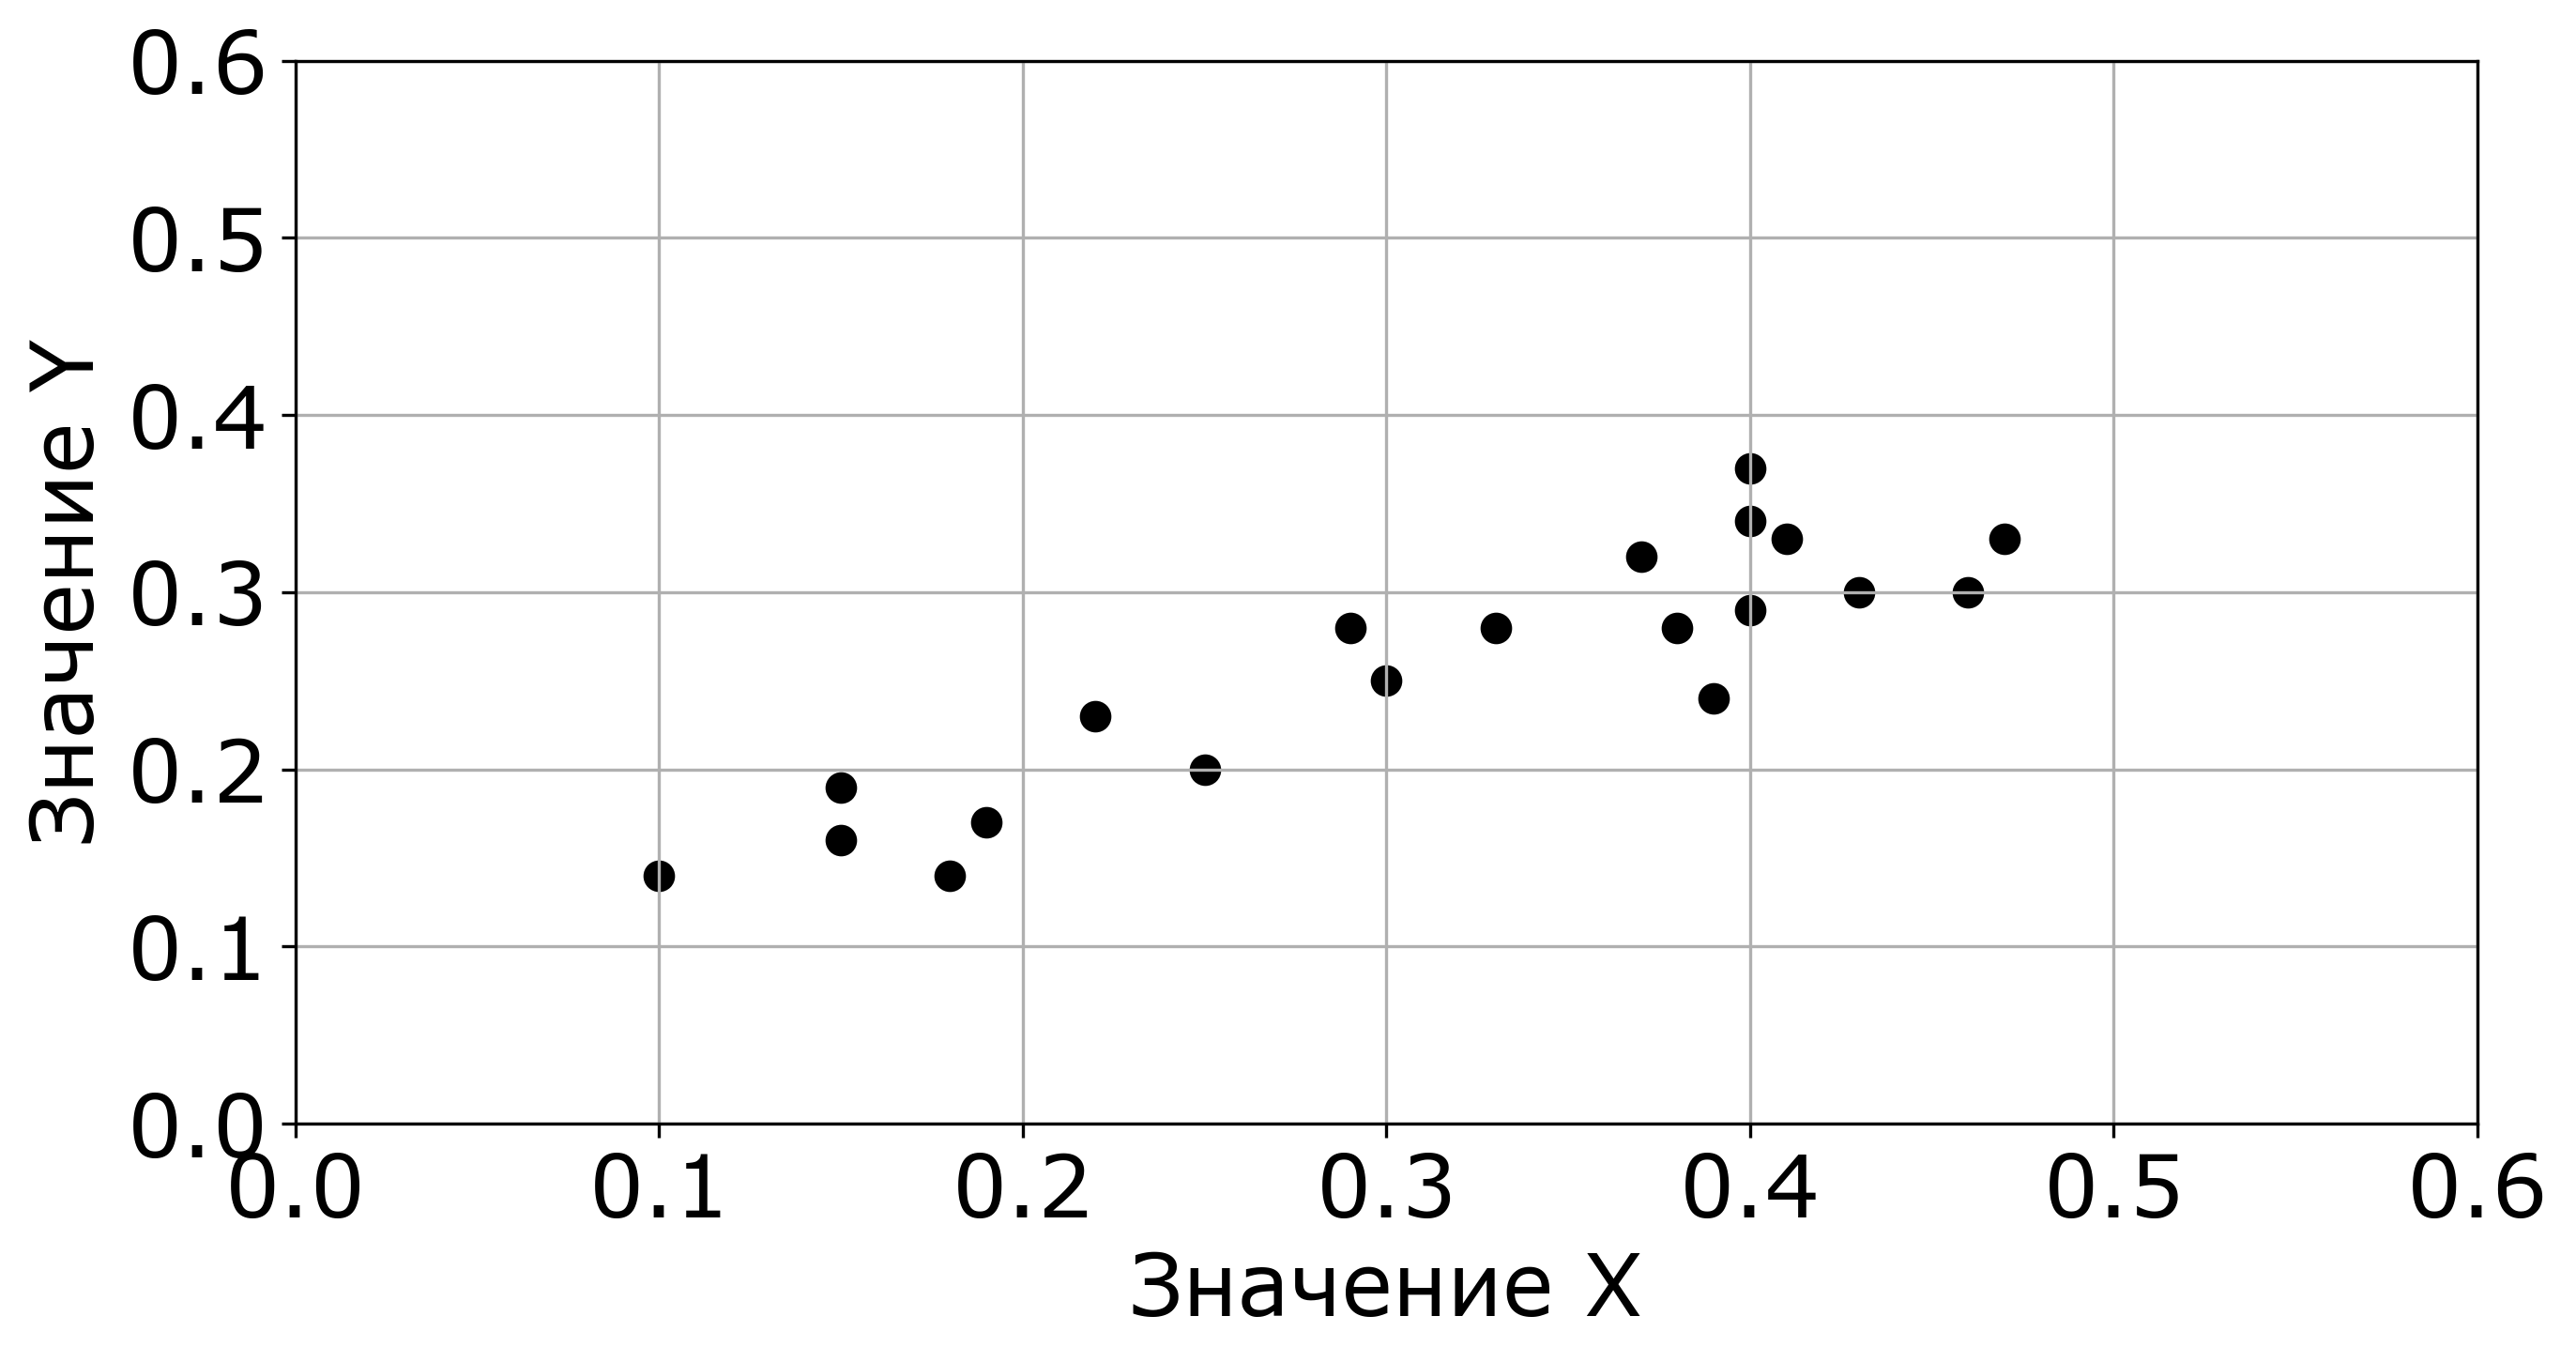

In [10]:
plot_data(X, y)      # Строим диаграму с точками

## Линейная функиция

Мы видим, что чем больше Х, тем выше Y. Можно сделать вывод, что между этими данными есть зависимость.

А еще можно заметить что точки примерно лежат на одной воображаемой линии.

То есть, эти точки можно описать какой-то линией, к которой прибавляется случайная ошибка (шум). За счет это точки лежат не прямо на прямой, а как бы "вокруг" нее. 

Это позволяет нам предположить, что данная зависимость может описаться линейной функцией вида:

$y = kX$, 

где $X$ это, а $y$, $k$ - коэффициент. Также $k$ можно называть параметром функции и весом функции.

Давайте посмотрим как выглядят функции вида $y = kX$ с разными коэффициентами $k$. 

Двигая слайдер можно менять значение коэффициента. Черные точки это наши данные. Ну а черная линяя - это функиция $y=kX$ с различными значения $k$.

Как видно по графику, наша функиция $y=kX$ это линия. Ну а сам такой вид функции называтеся линейной функцией.

In [11]:
choose_slope(X, y)

A Jupyter Widget

График - это конечно хорошо. Нам нужно как-то применять эту фунцию для предсказания значений.

Давайте реализуем линейню функцию на Python.

Небольшая ремарка. 

Перед каждой ячейкой с кодом будет текст с задачей, которая решает этот код и описание выходных и выходных данных.

Самая простая реализация линейной функции в самом простом виде выглядит так:

Для каждого элемента $X_i$ массива $X$ реализовать фукнуию $f(X_i) = kX_i$.

На входе:
* Массив ndarray $X$

* Значение коэффициента $k$


На выходе:
* На выходе массив ndarray со значениями $f(X_i) = kX_i$

In [12]:
def dummy_f(X, k):
    # Создаем результурующий список, где будем сохранять значения функции
    result = []                  
    
    # Перменная i в цикле будет менять свое значение в диапозоне (range) от 0 до размема массива X (len(X))
    for i in range(len(X)):    
        
        # Считаем значени y для i-этого элемента массива X
        y_i = k*X[i]    
        
        # Записываем результат в список
        result.append(y_i)
        
    # Создаем из списка массив ndarray        
    return np.array(result)

print(dummy_f(X, k=1))

[0.1  0.15 0.15 0.18 0.19 0.22 0.25 0.29 0.3  0.33 0.37 0.38 0.39 0.4
 0.4  0.4  0.41 0.43 0.46 0.47]


Но это не самая лучшая реализация. 

Можно воспользоватся возможностями NumPy. Из предыдущего урока по NumPy мы знаем что в нем есть опирация умножения массива на скаляр. Давайте ей воспользуемся

Для каждого элемента $X_i$ массива $X$ реализовать фукнуию $f(X_i) = kX_i$.

На входе:
* Массив ndarray $X$

* Значение коэффициента $k$


На выходе:
* На выходе массив ndarray со значениями $f(X_i) = kX_i$

In [13]:
def f(X, k):
    # Используем возможность ndarray и умножаем массив X на скаляр k
    # Результат этой операции это ndarray
    return k*X

print(f(X=X, k=1))

[0.1  0.15 0.15 0.18 0.19 0.22 0.25 0.29 0.3  0.33 0.37 0.38 0.39 0.4
 0.4  0.4  0.41 0.43 0.46 0.47]


Эта функиця выгдядит очень комактно и можно заметить что рузультаты совершенно одинаковы.

При этом, эта функция также работает и для одного элемента.

In [14]:
print(f(X=X[0], k=100))

10.0


Функция не только выгдядет проще и компактнее, но также она и во много раз быстрее.

Разница во времени выполнения функций dummy_f и f на массиве ndarray с 100000 элементов.

Функция                | Среднее время (микросекунд) 
-----------------------|-----------------------------
dummy_f     | 31400                       
f                      | 70                          

Как видно из таблицы, функция написанная с помощью NumPy быстрее в 45 раз!

*Примечание: время выполнения может отличться на разных компьютерах.*

## Функция ошибки

Ок. Мы научились реализовывать линейную функцию для различных $k$. Но это нам не отвечает на вопрос о том, какое $k$ подходит нам лучше всего.

Давайте снова посмотрим на различные линейные функции с различными $k$.

In [15]:
choose_slope(X, y)

A Jupyter Widget

У нас есть линейные фунции с различными $k$. Но как определить какая из них лучшая? И желательно сделать это так, что бы это можно было запрограммировать.

Для это введем **функцию ошибку**, также известную как **функцию потерь (loss function)**. Функция ошибки - численное значение того, насколько хорошо наша функция описывает данные. В данном случает это то, насколько предсказаные значения нашей функции отличаются от реальных.

Обозначается функция потерь как $Loss$, $L$ или $J$. Мы будем использовать $Loss$.

Лучше всего не использовать значение $L$. $L$ - часто используется как обозначение для функции правдопадобия, которая также 
часто используется в машинном обучении.

Давайте визуализируем разницу между точками которые предсказывает функция $f(X) = kX$ и реальными данными.

Опять же, черные точки - это реальные значения. Крестики - это предсказанаые значения в точках $X$. А красная линия это разница между придсказаными значениями и реальными.

In [16]:
plot_data_and_error(X, y)

A Jupyter Widget

Эту эту разницу можно использовать для оценки нашей функции $f(X) = kX$ и оценки параметра $k$.

Пусть у нас есть функция (наша модель):  

$\widetilde{y} = f(X) = kX$

То есть, $\widetilde{y}$ является предсказанными нами значениями для $X$. 

А настоящие значения будут равны $y$. 

Тогда ошибку нашего предсказания на $i$-ом примере $\widetilde{y}_i$ можно посчитать как: 

$error = \widetilde{y}_i - y_i$

Если нам не важно в большую или в меньшую сторону мы ошибаемся, можем избавиться от знака, взяв либо модуль либо квадрат ошибки. Для начала давайте возьмем квадрат. О модуле мы поговорим во втором уроке регрессии. Тогда ошибка $loss_i(k)$ на $i$-ом примере будет равна:

$loss_i(k) = (\widetilde{y}_i - y_i)^2$

$loss_i(k) = (kX_i - y_i)^2$

Давайте посмотрим на значения ошибок для наших точек для коэффициента $k = 1$.

In [17]:
k = 1
error_on_sample(X, y, k)

Разница на примере 0 равна -0.04
Разница на примере 1 равна -0.04
Разница на примере 2 равна -0.01
Разница на примере 3 равна 0.04
Разница на примере 4 равна 0.02
Разница на примере 5 равна -0.01
Разница на примере 6 равна 0.05
Разница на примере 7 равна 0.01
Разница на примере 8 равна 0.05
Разница на примере 9 равна 0.05
Разница на примере 10 равна 0.05
Разница на примере 11 равна 0.1
Разница на примере 12 равна 0.15
Разница на примере 13 равна 0.06
Разница на примере 14 равна 0.11
Разница на примере 15 равна 0.03
Разница на примере 16 равна 0.08
Разница на примере 17 равна 0.13
Разница на примере 18 равна 0.16
Разница на примере 19 равна 0.14


Как можно заметить, в начале разница отрицательная, а в после 6-го примера она становиться положительной.

Давайте посмотрим на квадрат разности между предсказаными значение и реальным для коэффициента $k = 1$.

In [18]:
k = 1
quad_error_on_sample(X, y, k)

Квадрат разницы на примере 0 равен 0.0016
Квадрат разницы на примере 1 равен 0.0016
Квадрат разницы на примере 2 равен 0.0001
Квадрат разницы на примере 3 равен 0.0016
Квадрат разницы на примере 4 равен 0.0004
Квадрат разницы на примере 5 равен 0.0001
Квадрат разницы на примере 6 равен 0.0025
Квадрат разницы на примере 7 равен 0.0001
Квадрат разницы на примере 8 равен 0.0025
Квадрат разницы на примере 9 равен 0.0025
Квадрат разницы на примере 10 равен 0.0025
Квадрат разницы на примере 11 равен 0.01
Квадрат разницы на примере 12 равен 0.0225
Квадрат разницы на примере 13 равен 0.0036
Квадрат разницы на примере 14 равен 0.0121
Квадрат разницы на примере 15 равен 0.0009
Квадрат разницы на примере 16 равен 0.0064
Квадрат разницы на примере 17 равен 0.0169
Квадрат разницы на примере 18 равен 0.0256
Квадрат разницы на примере 19 равен 0.0196


Тут у нас вся разница положительная.

Давайте посмотрим как это можно реализовать в коде.

In [19]:
k = 1
# f(X, k) возвращает массив ndarray
# y также массив ndarray
# И как мы помним из предыдущего урока, в NumPy реализована возможность поэлементной разности между массивами
errors = f(X, k) - y

print(errors)

[-0.04 -0.04 -0.01  0.04  0.02 -0.01  0.05  0.01  0.05  0.05  0.05  0.1
  0.15  0.06  0.11  0.03  0.08  0.13  0.16  0.14]


Теперь, за счет того, что в NumPy есть возможность поэлементного возведение в квадрат, посчитать квадратичную разность не составит труда.

In [20]:
k = 1
quad_errors = (f(X, k) - y)**2
print(quad_errors)

[1.60e-03 1.60e-03 1.00e-04 1.60e-03 4.00e-04 1.00e-04 2.50e-03 1.00e-04
 2.50e-03 2.50e-03 2.50e-03 1.00e-02 2.25e-02 3.60e-03 1.21e-02 9.00e-04
 6.40e-03 1.69e-02 2.56e-02 1.96e-02]


Мы научились оценивать ошибку предсказание на каждом примере. И у нас есть массив значений. Но хотелось бы иметь ровно одно число, которое даст оценку нашей функции. Сделать это довольно просто.

Мы можем посчитать среднюю ошибку $Loss(k)$ на всех примерах:

$\widetilde{y}_i = f(X_i) = kX_i$

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(\widetilde{y}_i - y_i)^2}$ 

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(f(X_i) - y_i)^2}$

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

Где $N$ - это колличество примеров, $X_i$ - это , $y_i$ - для i-oй, $\widetilde{y}_i$ - предсказанная для i-oй .

***Немного про нотацию.*** 

Функция потерь формально зависит от входных данных, реальных выходных данных, вида функции и параметров этой функции. 

То есть, $Loss(X, y, f, k)$. Но обычно, для краткости, мы предполагаем, что мы используем текущие $X$, $y$ и $f$ и пишем, что функция потерь зависит только от параметров функции -  $Loss(k)$.

Таким образом, сама функция потерь - это функция от одной переменной (параметра) $k$. То есть, это зависомтсть между выбраным параметром и ошибкой, котороая у нас будет после предсказания с этим параметром.

Давайте реализуем функцию ошибки.

Для входных данных массива $X$ и реального выходного значения $y$ необходимо реализовать функцию ошибки. 

На входе:

* Коэффициент $k$ функции $f(X)=kX$

* Массив входных значений $X$

* Массив реальных  выходных значений $y$

На выходе:

* На выходе значение фуникции ошибки $Loss(k)$

Формула функции ошибки:

$Loss(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

In [21]:
def loss_function(X, y, k):
    
    N = X.shape[0]                    # получаем размер вектора столбца
    # или N = len(X)
   
    J_for_sample = (k*X - y)**2
    J = np.sum(J_for_sample) / N      
    
    # или J = np.mean((k*X - y)**2)
    return J

k = 2
print(loss_function(X, y, k))

0.16419999999999998


Давайте рассмотрим ошибки для разных $k$

In [22]:
plot_data_and_loss(X, y)

A Jupyter Widget

Давайте теперь визуализируем всю функцию ошибки для всех функция значений $k$.

*Небольная ремарка: функция ошикби ниже была полчена не аналитически. Она была посчитана для огромного колличества параметров $k$ от -1 до 3.*

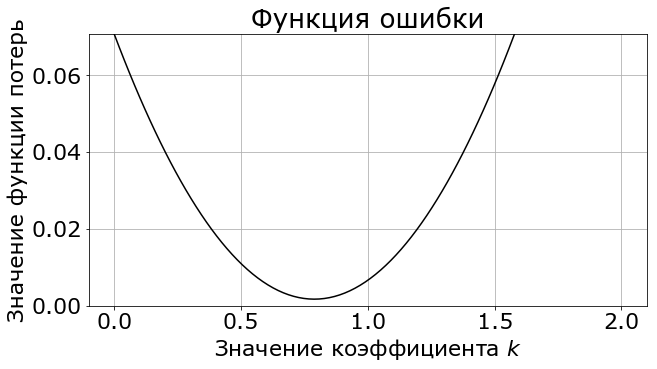

In [23]:
plot_all_loss(X, y)

По графику видно, что если взять коэффициент $k$ = 0, то мы получим ошибку равную 0.1. И можно заметить, что минимальное значение фунцикии ошибки будет около 1.

## Производная

Наша задачи - это минимизации функции ошибки. То есть, нужно найти такое $k$, для которого фунция $Loss(k)$ имеет минимальное значение.

Для решения этой задачи обратися к математике.

Давайте вспомним что такое *производная функции*.

### Определение

Производная функции $f(x)$ записывается как $f'(x)$ или же как $\dfrac{d f(x)}{dx}$. Мы будем применять оба варианта.

Сама производная это то, насколько значение функции меняется в зависимости от изменения входного значения. 

*Математически это выглядит как:*

$f'(x_0) = lim_{\Delta x \rightarrow 0}\dfrac{\Delta y}{\Delta x} = lim_{\Delta x \rightarrow 0}\dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$

Звучит очень здорово, но очень не понятно.

Давайте посмотрим на не самое математичное опредиление.

Пусть у нас есть некая функция $y = f(x)$. 

Возьмем точку $x_0$. Мы можем получить значение функции в этой точки $y_0 = f(x_0)$. 

А теперь возьмем точку рядом с $x_0$. Это можно сделать прибавив (или отняв) от $x_0$ какое-нибудь маленькое значение. Назовем его $\Delta x$. 

То есть, мы получаем $y_1 = f(x_0 + \Delta x)$.

Теперь посмотрим на разницу между значениями функции в точке $x_0$ и $x_0 + \Delta x$

Она записываеться как $\Delta y$.

$\Delta y = f(x_0 + \Delta x) - f(x_0)$

И если разделить $\Delta y$ на $\Delta x$ то это и будет производная в точке $x_0$.

То есть, производная равна:

$f'(x_0) = \dfrac{d f(x_0)}{dx} $

$f'(x_0) = \dfrac{\Delta y}{\Delta x} = \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$

Но очень важно, что бы $\Delta x$ был очень мальким числом. Обычно говорят что $\Delta x$ стремится к 0. И пишут это как $\Delta x \rightarrow 0$

### Геометрическая интерпритация

Посмотрим на функцию $f(x) = x^2 + 1.5$. Это функция параболы. 

На ее примере попробуем получить интуитивное понимание производной. 

Давайте еще раз перепишем формулу для производной.

$\Delta y = f(x_0+\Delta x) - f(x_0)$

$f'(x_0) = \dfrac{\Delta y}{\Delta x}$

#### Возврастающая функция в точке

 Рассмотрим пример производной для нее в точке $x_0 = 1.4$.

In [24]:
x0 = 1.4
derivation(x0=x0)

A Jupyter Widget

Красная точка - это значение функции $f(x_0)$ в точке $x_0$. 

Синяя точка точка - это значение функции $f(x_0+\Delta x)$ в точке $x_0+\Delta x$. 

Двигая слайдер, можно уменьшаять значени $\Delta x$.

Между синей и крастной точки проведена секущая. Угол между ней и осью $X$ обозначим как $\alpha$. 

Рассмотрим треугольник с катетами ${\Delta y}$ и ${\Delta x}$. Угол между катетом ${\Delta x}$ и гиппотинузой тоже будет равен $\alpha$.  

Из геометрии мы знаем что угол $tg(\alpha) = \dfrac{\Delta y}{\Delta x}$

Уменьшая $\Delta x$ мы получаем производную. При этом, наша секущая между синей и красной точки стала касательной к функции в точке $x_0$.

В нашем примере $f'(1.4) = 2.8$. 

Если производная положительная, то касательная возрастает (если смотреть с лева на право, то она увеличивается).

#### Убывающая функция в точке

Рассмотрим пример производной для нее в точке $x_0 = -1.3$.

In [25]:
x0 = -1.3
derivation(x0=x0)

A Jupyter Widget

Все тоже самое. Уменьшая $\Delta x$ мы получаем производную. И наша секущая становиться касательной. 

Но можно заметить что теперь наша касательная направлена в другую сторону, на убываение. И само значение производной стало отрицательной.

Можно считать, что производная в точке показывает "скорость" изменения функции. Она положительна если функция растет и отрицательн, когда функция убывает.

То есть, если производная **положительная** в точке $x_0$, и мы возьмем значение чуть *больше* чем $x_0$, то мы увидим что полученное значие *возрасло*. А если взять значение *меньшее* $x_0$, то значение функции будет *меньше* чем в точке $x_0$.

Наоборот с отрицательной производной. Если производная **отрицательная** в точке $x_0$, и мы возьмем значение чуть *больше* чем $x_0$, то мы увидим что полученное значие *уменьшилось*. А если взять значение *меньшее* $x_0$, то значение функции будет *больше* чем в точке $x_0$.

Еще ее можно интерпретировать как тангенс угола наклона $\alpha$ касательной к точке.

Обычно пишут что $f'(x_0) = tg(\alpha)$.

Доказателство положительной производной для возврастающей функции находится в конце ноутбука в приложении.

#### Производная в экстремуме

Рассмотрим повевдение производной в экстремумах.

Экстремум - это точка при которой функция принимает максимальные и минимальные значения.

In [26]:
derivation(x0=0)

A Jupyter Widget

Точках перегиба, производная равна 0. 

#### Аналитический вывод производной

Расмотрим функцию и ее производную и получим ее аналитически.

Напомню, наша функция выглядит как $f(x) = x^2 + 1.5$.

В какой-то точке $x_0$ производная будет равна:

$f'(x_0) = \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$


$f(x_0+\Delta x) = (x_0 + \Delta x)^2 + 1.5 = x_0^2 + 2x_0\Delta x + \Delta x^2 + 1.5$


$ \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x} = \dfrac{x_0^2 + 2x_0\Delta x + \Delta x^2 + 1.5 - (x_0^2 + 1.5) }{\Delta x} = \dfrac{2x_0\Delta x + \Delta x^2}{\Delta x}$


$\dfrac{2x_0\Delta x + \Delta x^2}{\Delta x} = 2x_0 + \Delta x$

И если мы будем счиать $\Delta x$ очень маленьким числом, тогда 

$f'(x_0) = 2x_0$

И если подставить значения для наших функций, то все должно сойтись с тем, что мы нашли исходя из геометрических соображений.
 
 $f'(1.4) = 2 \cdot 1.4 =  2.8$
 
 $f'(-1.3) = 2 \cdot (-1.3) = -2.6$

И сама производная для всех точек тогда будет выгдядеть так:

In [27]:
plot_simple_func_and_der()

A Jupyter Widget

Как вы помните из школьного курса, обычно производные считаются аналитически с помощью таблиц и особых правил, о которых мы говорим далее. А сейчас обсудим другой вопрос.

#### Так зачем нам это все? Как это поможет нам решить проблему?

Я вам напомню, что наша задача найти минимум нашей функции потеть $Loss(k)$.

Чем же производная может нам помочь?

Вернемся к нашей функции ошибки посмотрим на ее производные в разных точках:

In [28]:
plot_data_and_loss(X, y, with_der=True)

A Jupyter Widget

Допустим мы видим что производная равна отрицательному значению. Это значит что функция ошибки в окрестности данной точки убывает. То есть, если взять $k$ по-меньше, то ошибка будет расти, а если по больше, то ошибка будет убыват.

А теперь допустим производная положительна. Это значит что функция ошибки в окрестности данной точки возрастает. То есть, если взять $k$ по-больше, то ошибка будет расти, а если по-меньше, то ошибка будет убывать.

Тогда найти минимальное значени очень просто. Мы берем случайное значение $k$. Считаем значение производной для этого параметра. Если производная положительная, берем новое $k$ чуть меньше чем было, если прозводная отрицательная, то берем новое значение для $k$ чуть по-больше. Это все повторяем до тех пор, пока нас не устроит значение ошибки.

Но сначала давайте возьмем производную от нашей функции ошибки. Для этого рассмотрим следующие своства производной.

#### Свойства производных

##### Элементарные функции

Сначала посмотрим на таблицу с производными для элементарных функций (некоторых).

| Элементарная функция $f(x)$ | Производная $\dfrac{df(x)}{dx}$
| -----  | --- |
|  $a$   |  0  |
|  $x$   |  1  |
|  $ax$  |  a  |
|  $x^2$  |  $2x$ |
|  $x^n$  |  $nx^{n-1}$ |
|  $\ln(x)$  |  $\dfrac{1}{x}$ |
|  $ \sin (x)$  | $\cos (x)$  |
|  $\cos(x)$   |  $-\sin (x)$ |
|  $e^x$   |  $e^x$ |
|  $a^x$   |  $a^x \ln (a)$ |

$a$ - это константа.

*Пример:*

$\dfrac{dx^3}{dx} = (x^3)' = 3x^2$

##### Производное функции умноженую на константу

Если функция умножается на константу, то производная береться от функции без константы, затем это константа домножается на производную.

$(af(x))' = af'(x)$

*Пример:*

$(10x)' = 10$

$(20.1 x^3)' = 20.1 \cdot 3 x^2 = 60.3 x^2$

##### Производная суммы

Производная суммы (разности) равна сумме (разности) производных:

Для двух функций:
$(f_1(x) + f_2(x))' = f_1'(x) + f_2'(x)$

В общем случае: $\left(\sum_n f_n(x) \right)' = \sum_n f_n'(x)$

То есть, когда мы берем производную от суммы мы берем производную от каждого слагаемого и сумируем производные.

*Пример:*

$f(x) = 3x^2 + 20ln(x) + 3$

$f'(x) = (3x^2 + 20ln(x) + 3)'$

$f'(x) = (3x^2)' + (20ln(x))' + (3)'$

$f'(x) = 3\cdot2x + 20\cdot \dfrac{1}{x} + 0$

$f'(x) = 6x + \dfrac{20}{x}$

##### Производные сложных функций

При взятии производной сложной функции использоваться цепное правило (chain rule):

Интуитивное понимание. Мы смотрим какой порядок вычислиния операций и вычисляем производную с последней операции по первую и перемножая их.

Но что это значит?

Например, у нас есть фунция $f(x) = sin(e^{3x})$.

Что бы вычеслить эту функцию нужно сначало расчитать $u = 3x$. Затем $v = e^u$. И наконец $y = sin(v)$.

То есть:

1. $u = 3x$

2. $v = e^u$

3. $y = sin(v)$

А что бы вычеслить производную мы идем в обратном порядке. Сперва мы просто берем производную синуса (считая все то что в скобках за одну переменную), затем производную от экспоненты и наконец производную множетеля.

$\dfrac{df(x)}{dx} = \dfrac{d (sin(v))}{dv} \dfrac{d (e^u)}{du} \dfrac{d (3x)}{x} $

$\dfrac{df(x)}{dx} = cos(v) \cdot e^u \cdot 3x = cos(e^{3x}) \cdot e^{3x} \cdot 3x$

Математически это так:

$v = \psi(x)$

$u = \phi(v)$

$y= f(u)$

$\dfrac{df(x)}{dx} = \dfrac{df(u)}{du} \cdot \dfrac{du(v)}{dv} \cdot \dfrac{dv(x)}{dx}$

*Еще пример:*

$y = ln(10x)$

$u = 10x$

$y = ln(u)$

$\dfrac{dy}{dx} = \dfrac{d (ln(u))}{du} \cdot \dfrac{d(10x)}{dx}$ 

$\dfrac{d( ln(u))}{du} = \dfrac{1}{u}$

$\dfrac{d(10x)}{dx} = 10$


$\dfrac{dy}{dx} = \dfrac{1}{u} \cdot 10 = \dfrac{10}{10x} =  \dfrac{1}{x}$

*И еще один с суммой:*

$f(x) = (10x^2 + x)^3$

$u = 10x^2 + x$

$y = u^3$

$\dfrac{dy}{dx} = \dfrac{d (y) }{du} \cdot \dfrac{du}{dx}$ 

$\dfrac{dy}{dx} = \dfrac{d (u^3) }{du} \cdot \dfrac{d(10x^2 + x)}{dx}$ 

$\frac{d  (u^3)}{du} = 3u^2$

$\frac{d(10x^2 + x)}{dx} = 20x + 1$

$\frac{dy}{dx} = 3u^2 \cdot(20x + 1) = 3(10x^2 + x)^2 \cdot(20x + 1) $

### Производная функция ошибки

Напомним как выглядит наша функция ошибки:

$ J(k) = \dfrac{1}{N}\sum_{i=1}^{N}{(\widetilde{y}_i - y_i)^2} $,

$ J(k) = \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} $.

Ее производная обозначаеться так:

$ \dfrac{d(J(k))}{dk} = \dfrac{d  \left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right) }{dk} $.

Важно помнить что в данном случае мы считаем что $X$ и $y$ это константы.

Для простоты обозначим производну это так:

$ \dfrac{d \left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right) }{dk} =  \left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k'$

Сначала вспомним свойство производной функции умноженной на константу:

$\left( \dfrac{1}{N}\sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k' = \dfrac{1}{N} \left( \sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k'$

Теперь используем производную от суммы:

$ \dfrac{1}{N} \left( \sum_{i=1}^{N}{(kX_i  - y_i)^2} \right)_k' = \dfrac{1}{N}  \sum_{i=1}^{N}\left((kX_i  - y_i)^2 \right)_k'$

Осталось взять производную того, что под знаком суммы. 

Это производная сложной функции. 

$f(k) = (kX_i  - y_i)^2$

$u = kX_i  - y_i$

$ \dfrac{d(f(k))}{dk} = \dfrac{d(u^2)}{du} \dfrac{du}{dk} $

$\dfrac{d(u^2)}{du} = 2u = 2(kX_i  - y_i)$

$\dfrac{d(u)}{dk} = \dfrac{d(kX_i  - y_i)}{dk} = \dfrac{d(kX_i)}{dk}  - \dfrac{d(y_i)}{dk} = X_i - 0 = X_i$

$ \dfrac{d((kX_i  - y_i)^2)}{dk} = 2(kX_i  - y_i) X_i$

И собирая все вместе:

$ \dfrac{dJ(k)}{dk} = \dfrac{1}{N}  \sum_{i=1}^{N}2(kX_i  - y_i) X_i$

$\dfrac{dJ(k)}{dk} = \dfrac{2}{N}  \sum_{i=1}^{N}(kX_i  - y_i) X_i$

Ну и посмотрим на то, как выглядит эта производная.

In [29]:
plot_loss_and_der(X, y, same=True)

A Jupyter Widget

## Иcпользование производной для поиска минимума Loss

Рассмотрим как мы можем использовать производную для решения нашей задачи. 

*У нас есть функция ошибки $Loss(k)$. Нужно найти такое $k_m$, при котором $Loss(k_m)$ принимает минимальное значение.*

Можно всмомнить кто угол касательной в минимальной точке равно 0. 

Возможно, когда я обсуждал как найти значение минимума для данной функции вы уже знали решение этой задачи знакомое со школы. 
 $J'(k) = \frac{dJ(k)}{dk} = 0$.

Нужно взять производную функции ошибки и приравнять ее к нулю и решить уравнение относительно k. 

$\dfrac{dJ(k)}{dk} =  \dfrac{2}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i = 0$

Решив уравнение, мы получим значение для $k$

In [30]:
k_a = analytical_solution(X, y)
print(f"Аналитически решенное k={k_a}")

Аналитически решенное k=0.789153


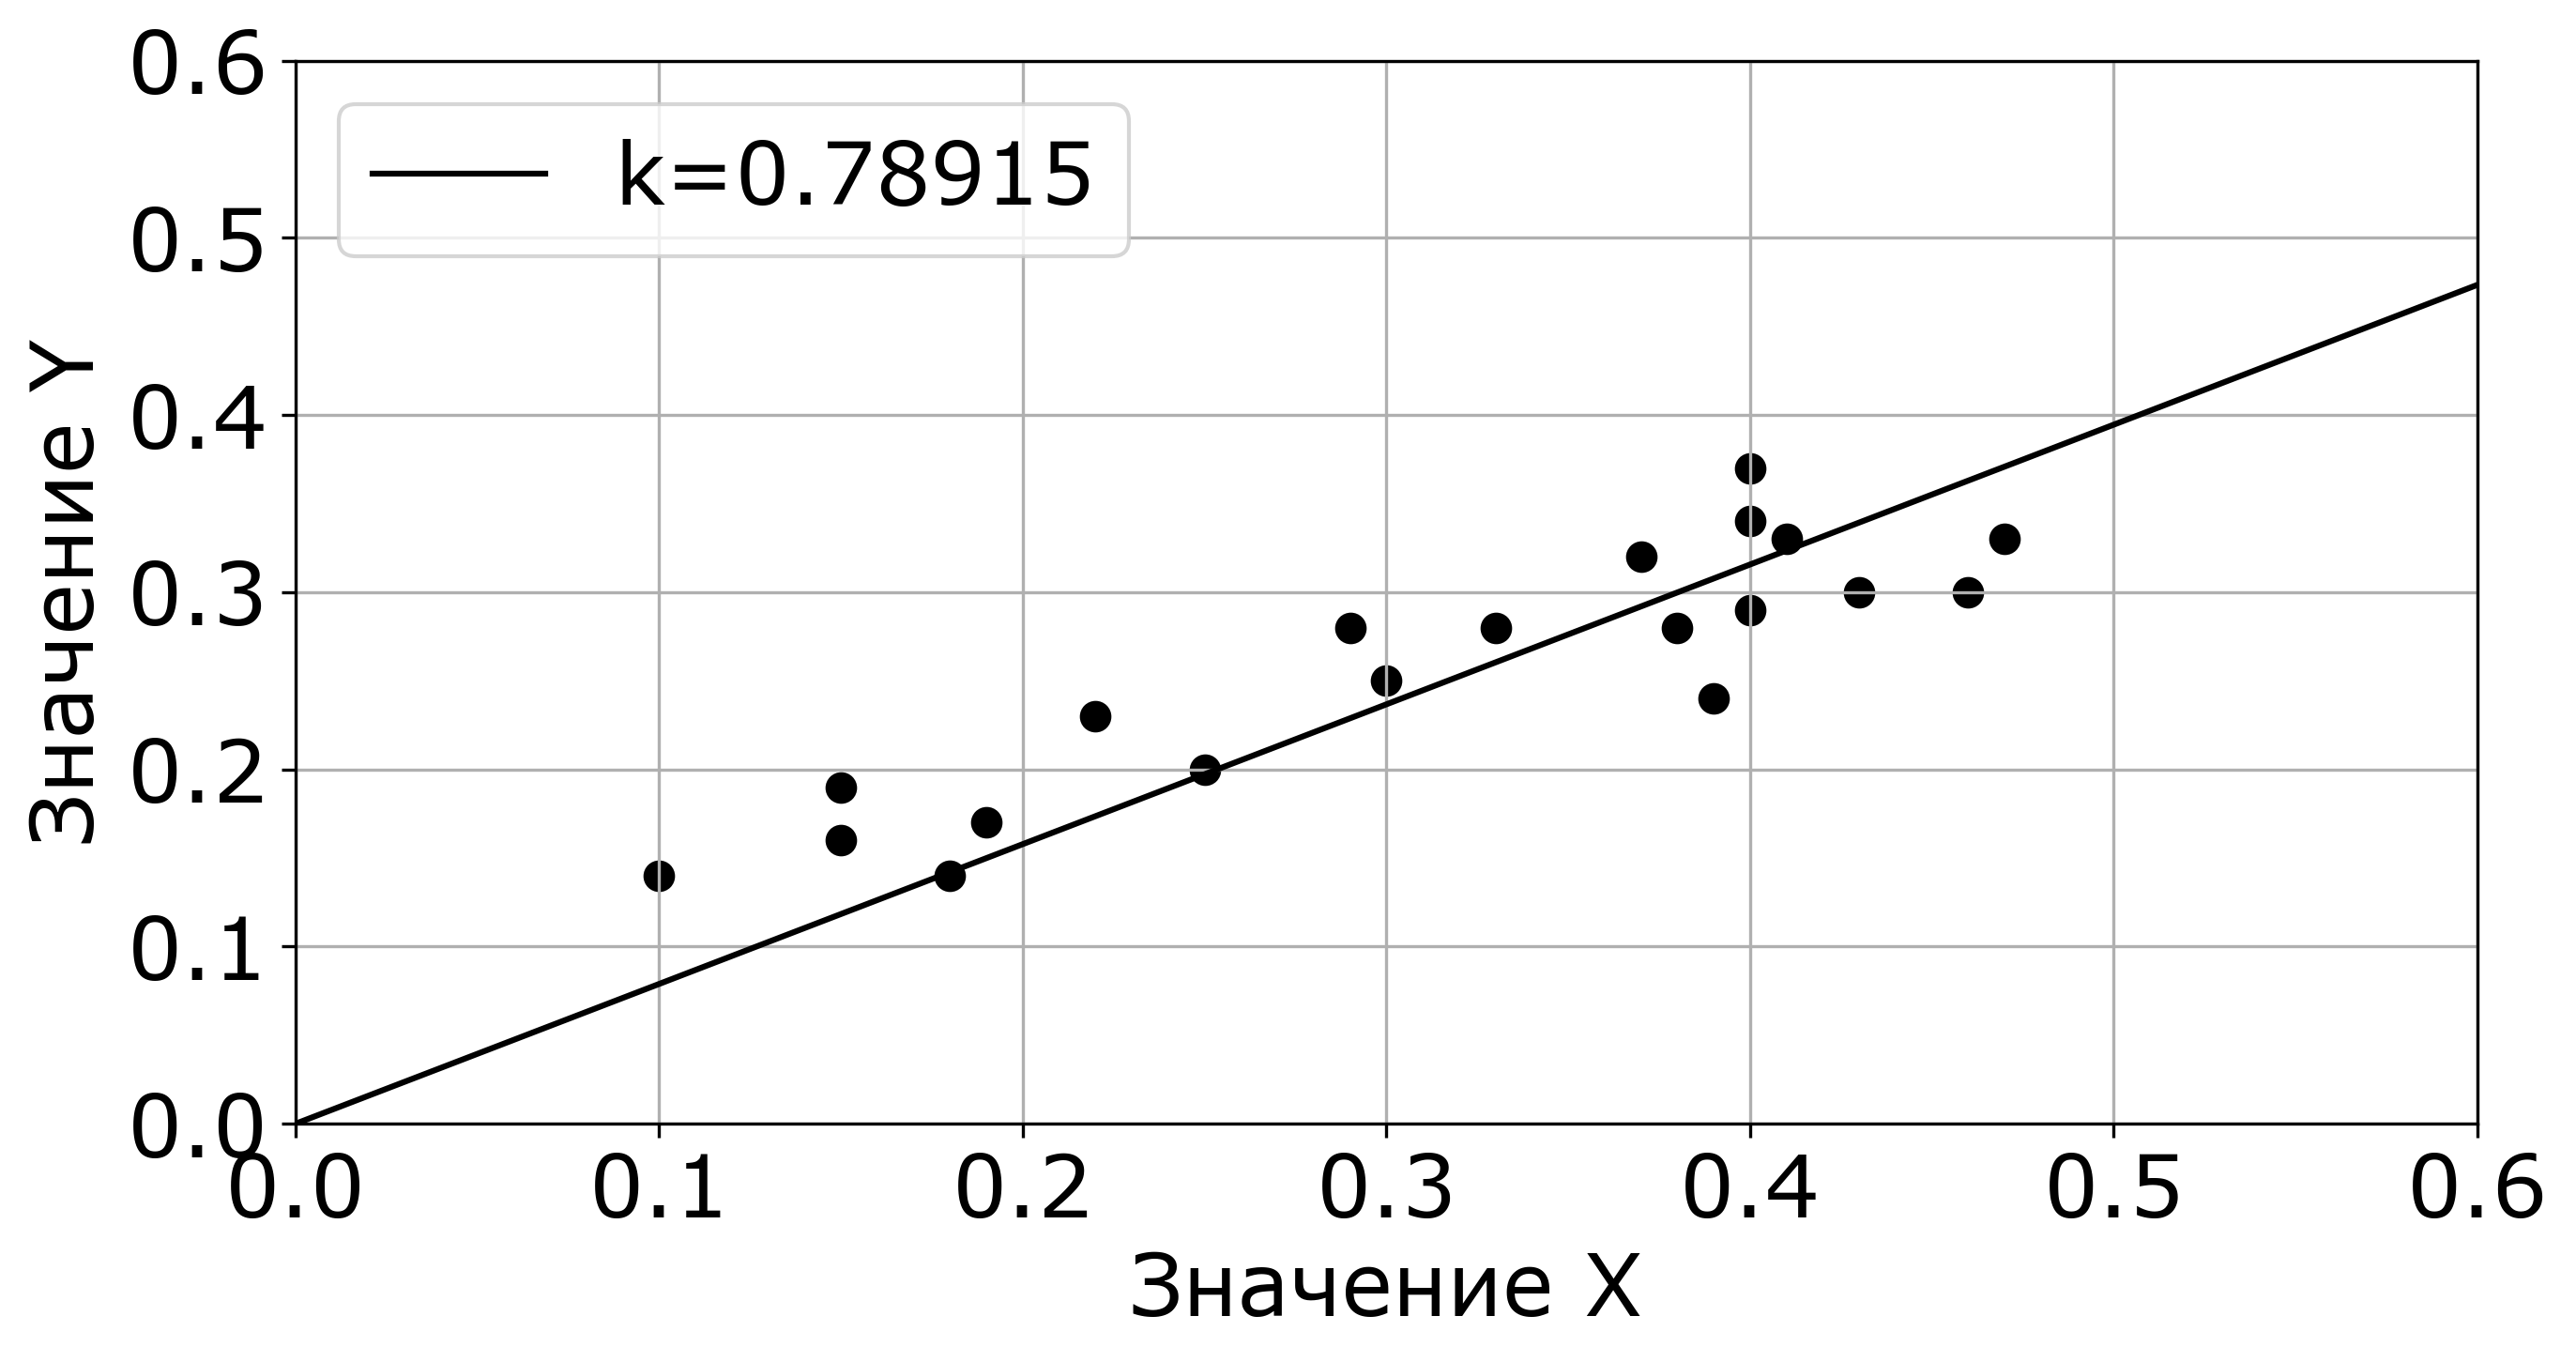

In [31]:
plot_data_and_hyp(X, y, k_a)

**Очень важно!**

Посчитать коэффициент аналитически можно только в данном простом, учебном примере. Но в реальных примерах не всегда возможно решить это уравнение. 

Поэтому, познакомимся с таким алгоритмом как градиентный спуск. 

Данный алгоритм является одним самых распространенных алгоритмов в машинном обучении. 

## Градиентный спуск

Идею градиентной скуска мы обсуждали ранее.

Значение производной в точке равно значению тангенса угла наклона касательной в данной точке или же показывает растет ли функция или убывает.

Допустим мы видим что производная равна отрицательному значению. Это значит что функция ошибки в окрестности данной точки убывает. То есть, если взять $k$ по-меньше, то ошибка будет расти, а если по больше, то ошибка будет убыват.

А теперь допустим производная положительна. Это значит что функция ошибки в окрестности данной точки возрастает. То есть, если взять $k$ по-больше, то ошибка будет расти, а если по-меньше, то ошибка будет убывать.

Тогда наш алгорти по поиску минимального значения можно описать следущим образом.

Мы берем случайное значение $k$. Считаем значение производной для этого параметра. Если производная положительная, берем новое $k$ чуть меньше чем было, если прозводная отрицательная, то берем новое значение для $k$ чуть по-больше. Это все повторяем до тех пор, пока нас не устроит значение ошибки.

Единственный вопрос, а на какое значение менять $k$?

Хотелось бы менять его на большое значение, когда $k$ далеко от оптимального. И менять $k$ не сильно, когда мы близко к минимуму.

Давайте еще раз посмотрим на функцию и ее производную.

In [32]:
plot_loss_and_der(X, y, der_value=True)

A Jupyter Widget

Чем дальшье мы от минимума, тем больще (по модулю) значение производной. Так давайте и использовать значение производной, раз нам и так нужно будет ее считать.

Таким образом сам алгоритм градиентного спуска можно описать следующим образом:

* Выбираем случайное значение для $k$
* Повторяем $M$ раз:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{d  J(k)}{dk}$,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$,

где $\alpha$ это коэффициент, который мы выбреем. Чаще всего он называется коэффициент обучения (learning rate).

$\alpha$ нам нужна, так как иногда производная может быть слишкой большой или слишком маленькой. Этим параметром мы можем ей управлять.

Давайте реализуем подсчет производной.

Для входных данных массива $X$, реального выходного значения $y$ и параметра $k$ необходимо реализовать подсчет производной. 

На входе:

* Коэффициент $k$ функции $f(X)=kX$

* Массив входных значений $X$

* Массив реальных  выходных значений $y$

На выходе:

* На выходе значение производной фуникции ошибки $Loss'(k)$

Формула производной функции ошибки:

$Loss'(k) = \dfrac{2}{N} \sum_{i=0}^{N}{(kX_i - y_i)X_i} $

In [33]:
def derivative_function(X, y, k):
    # С помощью f(X, k) мы находим массив предсказаных значений и вычитаем из него массив реальных выходных значений
    # Эту разность мы поэлементно умножаем на массив Х
    # С помощью функции np.mean мы получаем среднее значение массива.
    # np.mean(X) эквивалентной np.sum(X)/len(X)
    
    derivative = 2*np.mean((f(X, k) - y) * X)
    return derivative   

k = 1
print(derivative_function(X, y, k))

0.046729999999999994


Теперь зная как вычислять производную давайте реализуем градиентный спуск.

Для входных данных массива $X$, реального выходного значения $y$, начального значения $k_{init}$, значения параметра $\alpha$ необходимо реализовать градиентный спуск. 

На входе:

* Массив входных значений $X$

* Массив реальных  выходных значений $y$

* Начальный коэффициент функции $k_{init}$

* Коэффициент обучения $\alpha$

* Колличество итераций алгоритма $iter$

На выходе:

* На выходе значение коэффициента $k$ 

Алгоритм градиентного спуска:

* Выбираем случайное значение для $k$
* Повторяем $iter$ раз:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{d  J(k)}{dk}$,

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$. 

In [34]:
def gradient_descent(X, y, k_init, alpha, iters):
    
    # инициализируем начальное значение
    k = k_init
    
    # выполняем iters раз
    for i in range(0, iters):
        # считаем производную, умножаем ее на коэффициент обучение
        # меняем коэффициент на значение производной умноженной на альфу
        k = k - (alpha * derivative_function(X, y, k))
        
        # Можно заменить на 
        # k -= alpha * derivative_function(X, y, k)
    # возвращаем посчитанное значение
    return k

k_init = 1.0
alpha = 1
iters = 100
k_gd = gradient_descent(X, y, k_init, alpha, iters)

print(f"Значение после градиентного скуска k={k_gd}")

Значение после градиентного скуска k=0.7891530929955966


In [35]:
print(f"Аналитически решенное k={k_a}")

Аналитически решенное k=0.789153


In [36]:
print(f"Значение функции ошибки после обучения {loss_function(X, y, k_gd)}")

Значение функции ошибки после обучения 0.0017285620177773773


In [37]:
print(f"Значение функции ошибки для аналитического решения {loss_function(X, y, k_a)}")

Значение функции ошибки для аналитического решения 0.001728562017778336


In [38]:
print(f"Разница {loss_function(X, y, k_a) - loss_function(X, y, k_gd)}")

Разница 9.58651560911683e-16


Рассмотрим как ведет себя алгоритм с различными параметрамами $\alpha$:

Мы можем выбрать начальную точку, коэффициент обучения и коллчество итераций алгоритма градиентного спуска.

Справа у нас значение функции ошибки и точки полученные при градиентном спуске. 

Слева у нас полученная функция. А точее, полученыый коэффицинет $k$.

In [39]:
interactive_gradient_descent(X, y)

A Jupyter Widget

Увеличивая $\alpha$ мы можем заметить что алгоритму тебуется меньше итераций.

Но есть интересный случай. Если мы увеличиваем значение коэффициента $\alpha$, то наш алгоритм начинает расходиться.

## Как это можно использовать?

Возможно, дойдя до такого момента, вы можете спросить: это что мне нужно каждый раз производные считать, если я хочу просто линейную регрессию посчитать?

Ответ: нет.

Конечно существуют готовые решения. 

Есть замечательная библиотека sklearn. Используя ее, мы можем в 3 строчки посчитать линейную регрессию. Сделаем это.

In [42]:
# загружаем линейную регрессию из библиотеки sklearn
# в ней реализован класс LinearRegression
from sklearn.linear_model import LinearRegression

# создаем объект линейной регрессии. не обращайте внимание на атрибут fit_intercept
lr = LinearRegression(fit_intercept=False)

# обучаем нашу модель. То есть, запускаем алгоритм, который находит оптимальные параметры. 
# нужно будет немного поменять shape входных данных
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# И получаем значение коэффицинта
k_sklearn = lr.coef_[0, 0]

In [43]:
print(f"Значение после градиентного скуска k={k_gd}")
print(f"Аналитически решенное k={k_a}")
print(f"Значение коэффициента посчитанное с помощью skealrn k={k_sklearn}")

Значение после градиентного скуска k=0.7891530929955966
Аналитически решенное k=0.789153
Значение коэффициента посчитанное с помощью skealrn k=0.7891530929928257


In [44]:
print(f"Абсолютная разница между {abs(k_gd - k_sklearn)}")

Абсолютная разница между 2.7708946248594657e-12


Давайте посмотрим на наш конечный результат.

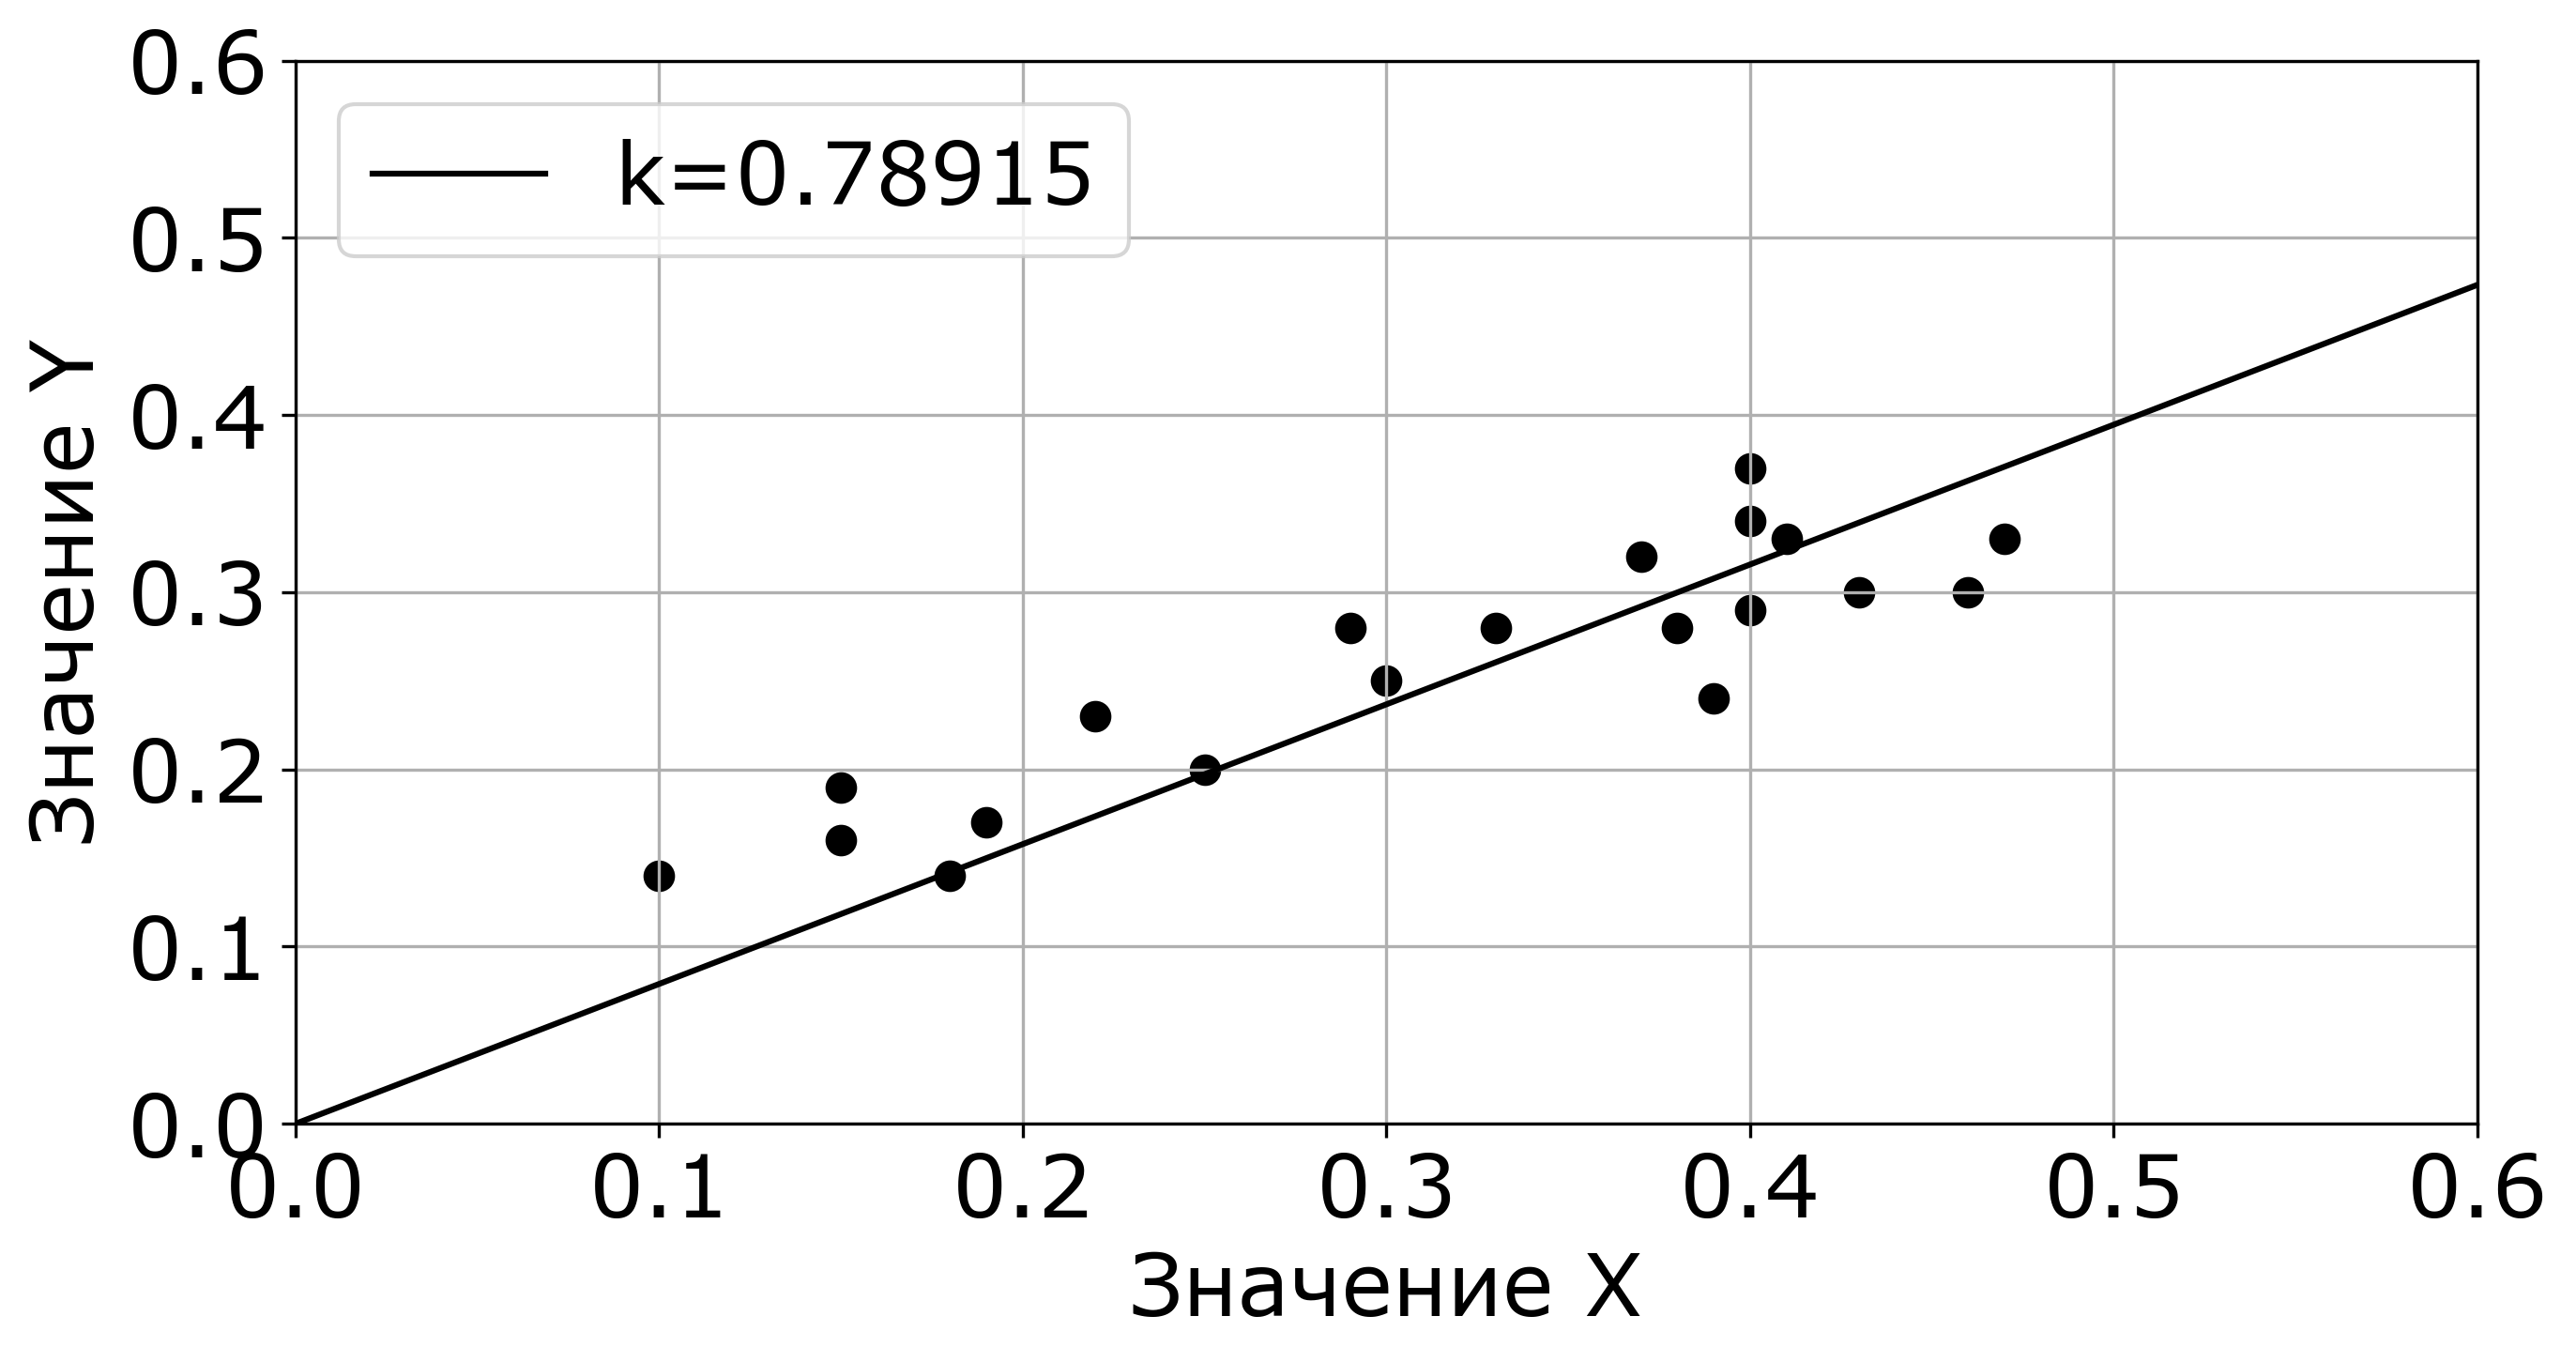

In [45]:
plot_data_and_hyp(X, y, k_gd)

# Немного усложним пример

Можно заметить, что функция выходит из 0 по оси $Y$. Но кажеться что она должна выходить из 0.1.

В качестве гипотезы мы использовали функцияю вида $f(X) = kX$.

Такой вид фукнции всегда будет выходить из 0.

Я называл функци $f(X) = kX$ линейной функцией. Но многие из вас могли заметить, что это не совсем линейная функция. Линейная фунция на самом деле выглядит так:

$f(X) = kX + b$.

Давайте на нее посмотрим.

In [46]:
choose_slope_with_bias(X, y)

A Jupyter Widget

Давайте изменим гипотезу и теперь будем использовать "настоящую" линейную функцию.

Давайте ее реализуем.

Для каждого элемента $X_i$ массива $X$ реализовать фукнуию $f(X_i) = kX_i + b$.

На входе:
* Массив ndarray $X$

* Значение коэффициента $k$

* Значение коэффициента $b$

На выходе:
* На выходе массив ndarray со значениями $f(X_i) = kX_i + b$

In [47]:
def f(X, k, b):
    return k*X + b

k = 10
b = -10
print(f(X, k, b))

[-9.  -8.5 -8.5 -8.2 -8.1 -7.8 -7.5 -7.1 -7.  -6.7 -6.3 -6.2 -6.1 -6.
 -6.  -6.  -5.9 -5.7 -5.4 -5.3]


Перепишем функцию ошибки:

$\hat{y} = f(X) = kX + b$. То есть, $\hat{y}$ является предсказанными нами значениями для $X$. 
А настоящие значения будут равны $y$. 

Тогда ошибка на одном примере равна $error_i(k, b)$ на i-ом примере будет равна:

$error_i(k, b) = (\hat{y_i} - y_i)^2 = ((kX_i + b) - y_i)^2$.

А на всех примерах:

$Loss(k, b) = \dfrac{1}{N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=0}^{N}{((kX_i + b) - y_i)^2} $



Можно заметить, что теперь у нас ошибка зависит не только от $k$, но и от $b$.

Реализуем ее.

Для входных данных массива $X$ и реального выходного значения $y$ необходимо реализовать функцию ошибки. 

На входе:

* Массив входных значений $X$

* Массив реальных  выходных значений $y$

* Коэффициент $k$ функции 

* Коэффициент $b$ функции 

На выходе:

* На выходе значение фуникции ошибки $Loss(k, b)$

Формула функции ошибки:

$Loss(k, b) = \dfrac{1}{N} \sum_{i=0}^{N}{((kX_i + b)- y_i)^2} $

In [48]:
def linearn_loss_function(X, y, k, b):
    # Эта функция ошибки идентична предыдущей. За исключение другой линейной функции    
    return np.mean(( f(X, k, b) - y)**2)

k = 0
и = 0
print(linearn_loss_function(X, y, k, b))

105.21073999999999


Давайте посмотрим как теперь выгдядит функция ошибки. 

Но так как она теперь зависит от 2-х параметров, то теперь для ее визуализации нам нужно 3D пространство.

In [49]:
plot_linear_loss_in_3d(X, y)

A Jupyter Widget

Но проще всего нам просто смотрет на функцию сверху.

График ниже, это как бы вид сверху на 3D функцию. 

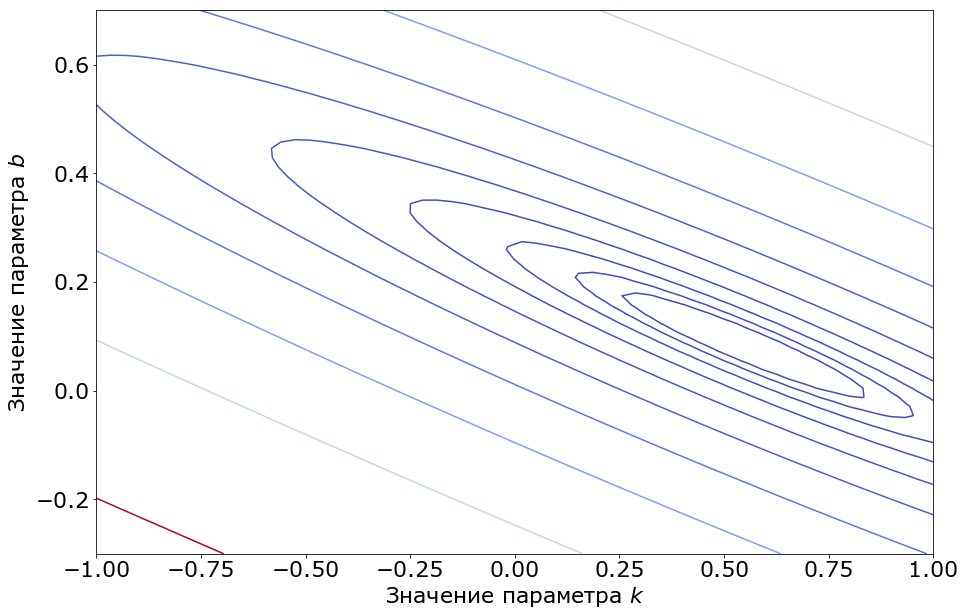

In [50]:
plot_linear_loss_in_3d_up(X, y)

Хорошо. 

У нас есть функция ошибки. Но теперь она от двух параметров. Что нам теперь делать?

Алгоритм, который мы использовали, называется градиентны спуск. 

Он так называется не спроста.

## Градиент

Давайте введем понятие градиента.

Градиент фунцкии $\phi(x_0, x_1, \ldots x_N)$ от $N$ переменных это 

$N$ значений: $\dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_0}, \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_1}, \ldots \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_N}$

Обозначается как $grad (\phi)$ или  $\nabla \phi$ (читается как набла фи) 

Например, градиент функции $\phi(x, y)$  от двух переменых это:

$grad (\phi) = \nabla \phi = \left[\dfrac{\delta \phi(x, y)}{\delta x}; \dfrac{\delta \phi(x, y)}{\delta y} \right]$

Эти значения можно считать координатами вектора (в декартовой системе координат) и их можно записать как: 

$grad (\phi) = \nabla \phi = \dfrac{\delta \phi(x, y)}{\delta x} \cdot \overleftarrow{i} + \dfrac{\delta \phi(x, y)}{\delta y} \cdot \overleftarrow{j}$

$\dfrac{\delta \phi(x, y)}{\delta x}$ - это *частная* производная по $x$.

Соответсвтенно, $\dfrac{\delta \phi(x, y)}{\delta y}$ - это частная производная по $y$.

Что это значит? 

При вычислении частной производно от какой-либо переменной, например $x$, остальные переменные мы счиатем константой.

### Пример вычисления градиента

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} =
\dfrac{\delta (1.5x + 2.5)^2 }{\delta x} +
\dfrac{\delta (2.5y^2)  }{\delta x} +
\dfrac{\delta (0.5) }{\delta x}
= 1.5 \cdot 2(1.5x + 2.5) + 0 + 0= 4.5x + 7.5$
 

$\dfrac{\delta \phi(x, y)}{\delta y} =
\dfrac{\delta (x + 1.5)^2 }{\delta y} +
\dfrac{\delta (2.5y^2)  }{\delta y} +
\dfrac{\delta (0.5) }{\delta y}
= 0 + 2 \cdot 2.5y + 0= 5y$

Давайте визуализируем  функцию $\phi(x, y) = (x + 1.5)^2 + 2.5y^2 + 0.5$

In [51]:
plot_func_in_3d()

A Jupyter Widget

Рассмотрим ее сверху.

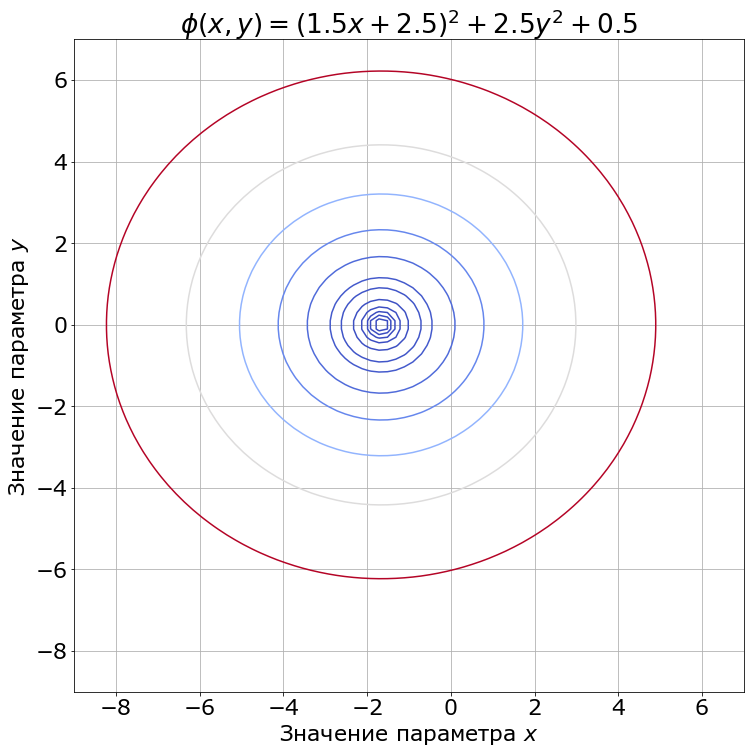

In [52]:
plot_3d_func_with_grad()

Теперь посчитаем на ее градиент (подробно он был расчитан выше).

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} = 4.5x + 7.5$

$\dfrac{\delta \phi(x, y)}{\delta y} = 5y$

Тогда сам градиент из точки (0.4; 0.8) это вектор с началом из этой точки, который направленый всторону * **от** минимума*.

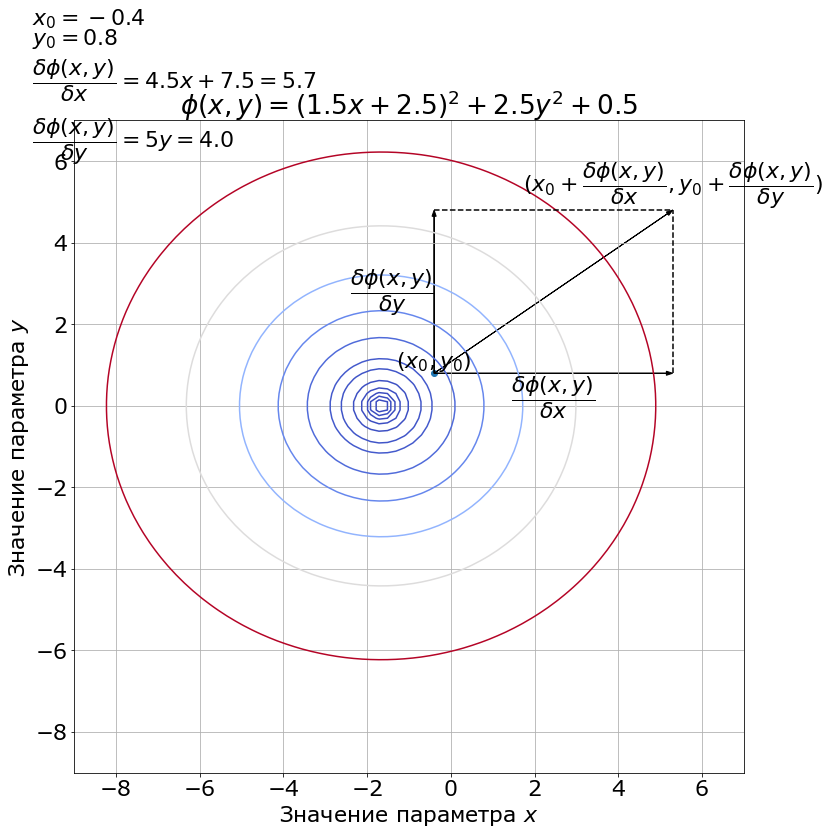

In [53]:
plot_3d_func_with_grad(x0=-0.4, y0=0.8, pos_neg_grad='positive')

И если мы возьмем отрицательный градиент (антиградиент), то этот вектор будет направлен * **в** сторону* минимума.

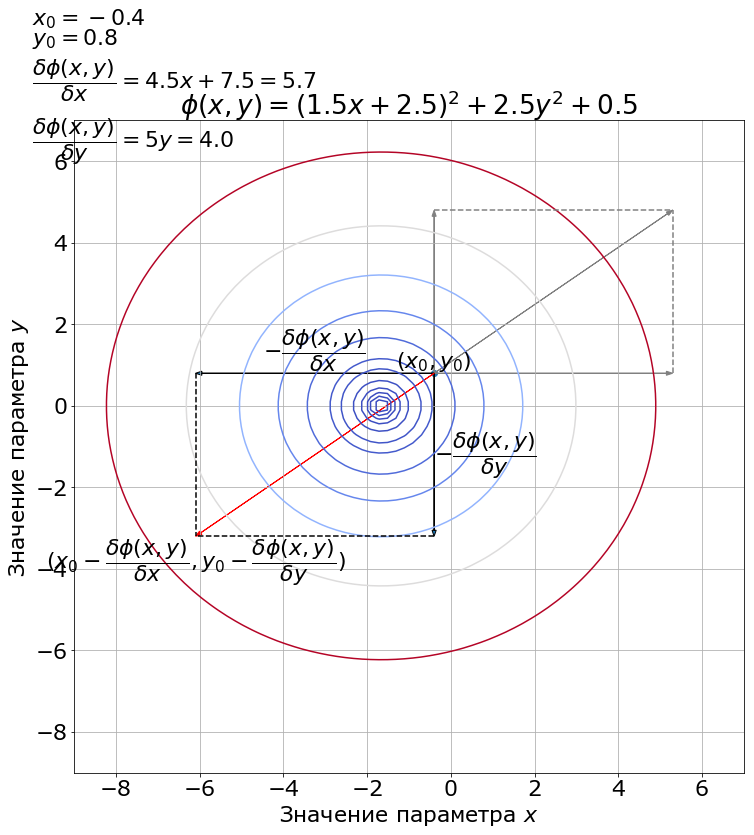

In [54]:
plot_3d_func_with_grad(x0=-0.4, y0=0.8, pos_neg_grad='negative')

Ниже можно посмотреть значения градиента и антиградиента для разных точек. 

Тут наглядно можно увидеть, что, что бы попасть в минимум нужно обязательно уменьшать градиент коэфициентом $\alpha$.

In [55]:
plot_3d_func_with_grad_interactive()

A Jupyter Widget

### Градиент функции ошибки

Зная все это мы можем найти градиент нашей функции ошибки и использовать его для поиска минимума.

Наша функция ошибки зависит от двух параметров $k, b$:

$Loss(k, b) = \dfrac{1}{N}\sum_{i=1}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{( (k X + b)  - y_i)^2}$

Тогда градиент функции ошибки будет следующий:

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{1}{N} \sum_{i=1}^{N} 2((k X_i + b)  - y_i)\dfrac{\delta ((k X_i + b)  - y_i) }{\delta b}$ 

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)( 0 + 1 + 0)$ 

$\dfrac{\delta  Loss(k, b)}{\delta b} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)$ 

$\dfrac{\delta Loss(k, b)}{\delta k} = \dfrac{1}{N} \sum_{i=1}^{N} 2((k X_i + b)  - y_i)\dfrac{\delta ((k X_i + b)  - y_i) }{\delta k}$ 

$\dfrac{\delta  Loss(k, b)}{\delta k} = \dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)( X_i + 0 + 0)$ 

$\dfrac{\delta  Loss(k, b)}{\delta k} = \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i$ 

$\nabla Loss(k, b) = \left[\dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i ; \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i) \right]$

Давайте реализуем градиент.

Для входных данных массива $X$, реального выходного значения $y$ и параметров $k$ и $b$ необходимо реализовать подсчет производной. 

На входе:

* Массив входных значений $X$

* Массив реальных  выходных значений $y$

* Коэффициент $k$

* Коэффициент $b$

На выходе:

* На выходе массив значений градиента фуникции ошибки $\nabla Loss(k, b)$. 

Нулевой элемент выходного массива - это частная производная по $k$, первый элемент частная производная по $b$.

Формула градиента функции ошибки:

$\nabla Loss(k, b) = \left[\dfrac{2}{N} \sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i ; \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i) \right]$

In [56]:
def gradient_function(X, y, k, b):
    # С помощью f(X, k, b) мы находим массив предсказаных значений и вычитаем из него массив реальных выходных значений
    # Эту разность мы поэлементно умножаем на массив Х
    # С помощью функции np.mean мы получаем среднее значение массива.
    # np.mean(X) эквивалентной np.sum(X)/len(X)
                        
    grad_k = 2*np.mean( ((k * X + b) - y) * X)
    grad_b = 2*np.mean( ((k * X + b) - y))
    return np.array([grad_k, grad_b])

k = 5
b = 1
print(gradient_function(X, y, k, b))

[1.56025 4.621  ]


Тогда алгоритм градиентного спуска теперь можно переписать как:

* Выбираем случайное значение для $k$ и $b$
* Повторяем $iter$ раз:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b_{new} = b  - \alpha \cdot \dfrac{\delta J(k, b)}{\delta b} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{\delta J(k, b)}{\delta k} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b = b_{new}$, 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $k = k_{new}$
    

где $\alpha$ это коэффициент обучения

Реализауем градиентный спуск. 

Для входных данных массива $X$, реального выходного значения $y$, начальных значений $k_{init}$ и $b_{init}$, значения параметра $\alpha$ необходимо реализовать градиентный спуск. 

На входе:

* Массив входных значений $X$

* Массив реальных  выходных значений $y$

* Начальный коэффициент функции $k_{init}$

* Начальный коэффициент функции $k_{init}$

* Коэффициент обучения $\alpha$

* Колличество итераций алгоритма $iter$

На выходе:

* На выходе значение коэффициентов $k$ и $b$ 

In [57]:
def gradient_descent(X, y, k_init, b_init, alpha, iters):
    k = k_init
    b = b_init
    for i in range (0, iters):
        gradients = gradient_function(X, y, k, b)
        k = k - (alpha * gradients[0])
        b = b - (alpha * gradients[1])
    
    return k, b


k_init = -5
b_init = 0
alpha = 0.75
iters = 500


k_gd, b_gd = gradient_descent(X, y, k_init, b_init, alpha, iters)

print(f"Значения коэффициентов k={k_gd} и b={b_gd}")

Значения коэффициентов k=0.5480993532691157 и b=0.0851741143758166


In [58]:
print(f"Значене функции ошибки после обучения {linearn_loss_function(X, y, k_gd, b_gd)}")

Значене функции ошибки после обучения 0.0009136045959867065


Визуализируем результат.

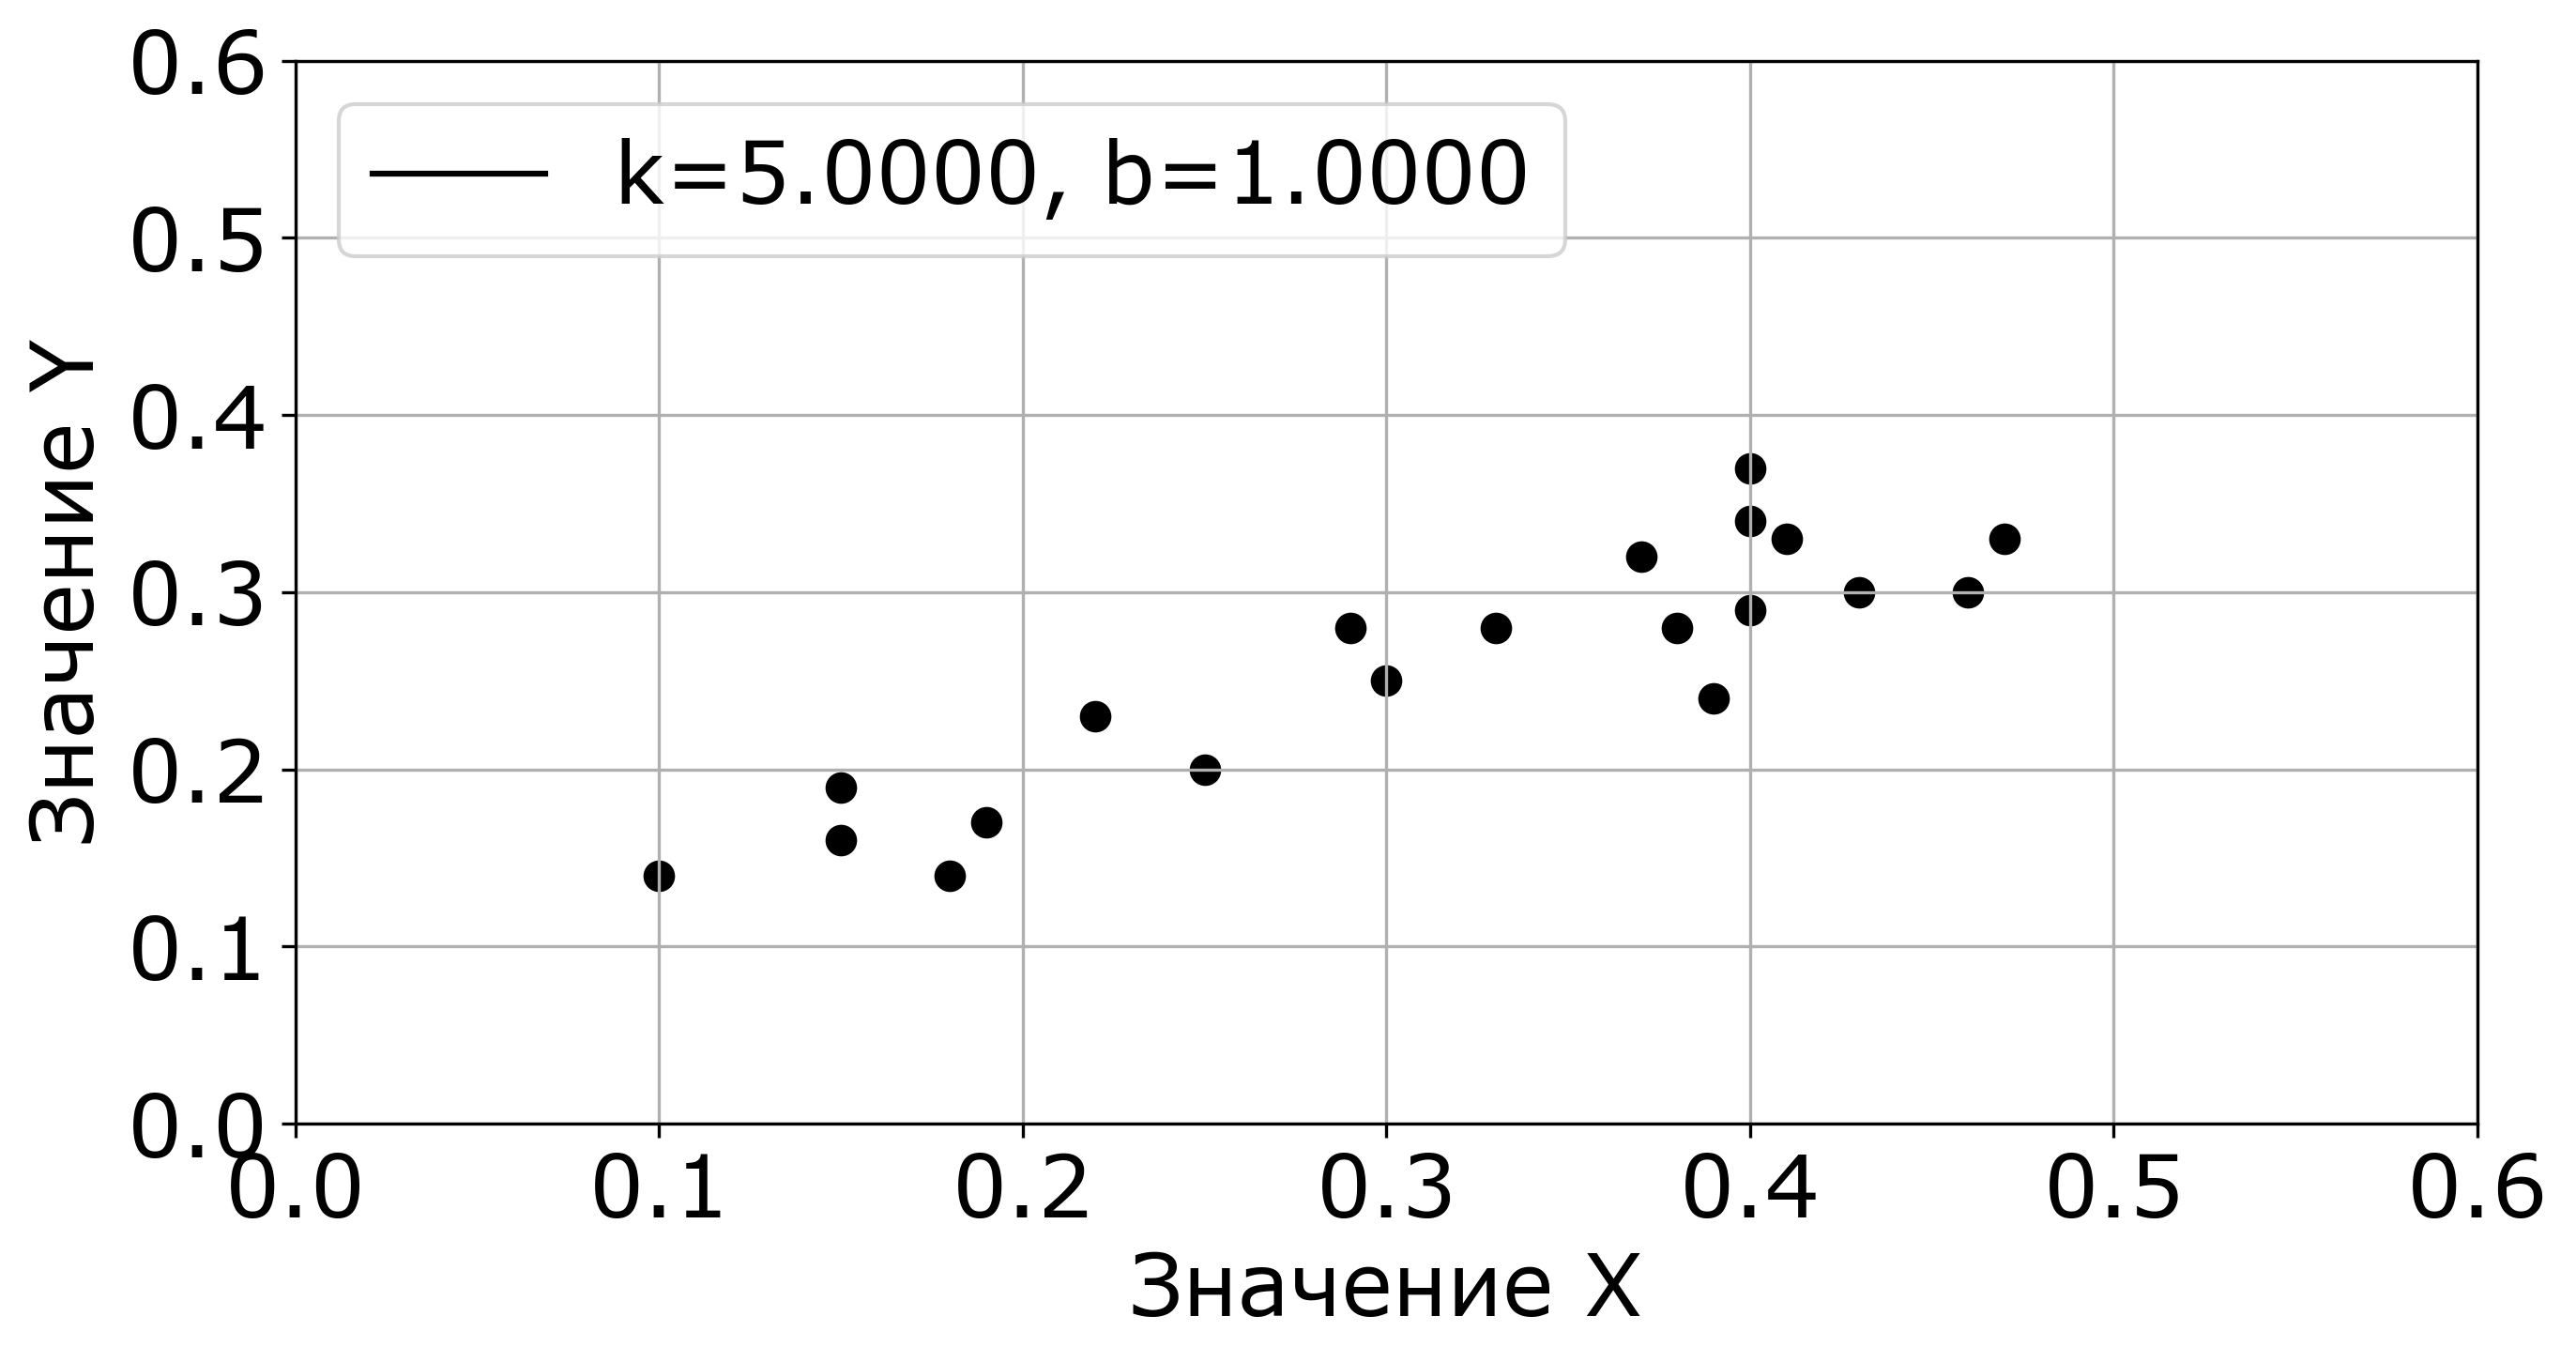

In [59]:
plot_data_and_hyp_with_bias(X, y, k, b)

Давайте посмотрим как наш градиентный спуск работал.

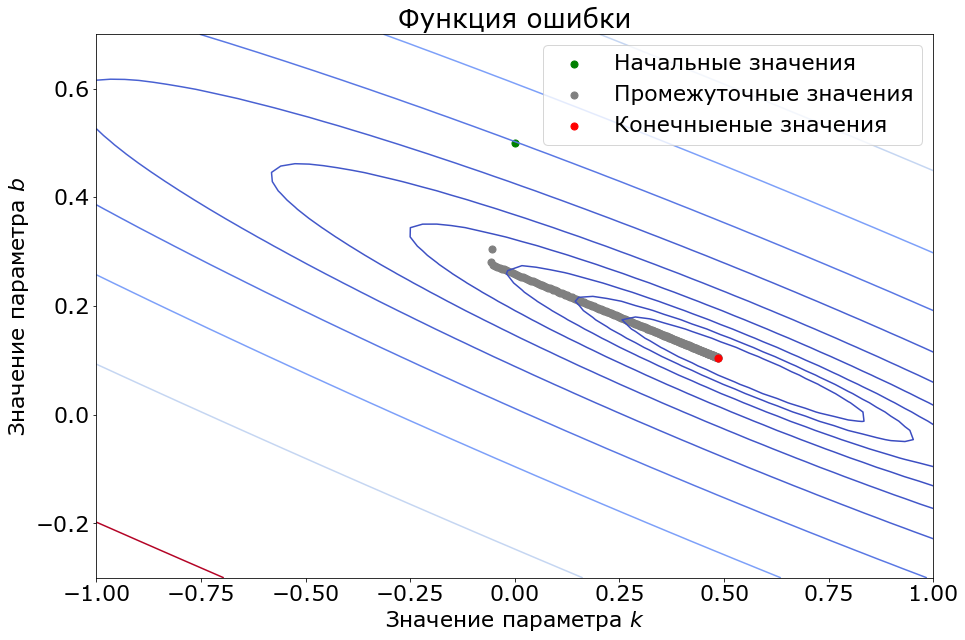

In [60]:
#alpha=0.75 интересный случай
alpha=0.4
plot_gradient_descent_in_3d(X, y, iters=250, alpha=0.4)

Давайте теперь посмотрим как высчитывался градиент и менялась целевая функция на разных итерациях градиентного спуска.

In [61]:
plot_gradient_descent_in_3d_interactive(X, y, iters=200, alpha=0.75)

A Jupyter Widget

### Приминение sklearn для решения задачи линейной регресии

In [63]:
# создаем объект линейной регрессии. 
lr = LinearRegression()

# до этого мы создавали его так LinearRegression(fit_intercept=False)
# этот параметр отвечал за вид функции 
# при fit_intercept=False используется функция f(x) = kx
# если не указывать этот параметр, то используется функция f(x) = kx + b

# обучаем нашу модель
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# И получаем значение коэффицинтов
k_sklearn = lr.coef_[0, 0]
b_sklearn= lr.intercept_[0]

In [64]:
print(f"Значения коэффициентов k={k_sklearn} и b={b_sklearn}")

Значения коэффициентов k=0.5490016157666915 и b=0.08488799345714224


In [65]:
print(f"Значене функции ошибки после обучения {linearn_loss_function(X, y, k_sklearn, b_sklearn)}")

Значене функции ошибки после обучения 0.000913594382717281


In [66]:
print(f"Значение коэффициентов после градиентного спуска k={k_gd}, b={b_gd},  ")
print(f"Значение коэффициента посчитанное с помощью skealrn k={k_sklearn}, b={b_sklearn}")

Значение коэффициентов после градиентного спуска k=0.5480993532691157, b=0.0851741143758166,  
Значение коэффициента посчитанное с помощью skealrn k=0.5490016157666915, b=0.08488799345714224


In [67]:
print(f"Абсолютная разница между параметрами k: {abs(k_gd - k_sklearn)}")

Абсолютная разница между параметрами k: 0.0009022624975757454


In [68]:
print(f"Абсолютная разница между параметрами b: {abs(b_gd - b_sklearn)}")

Абсолютная разница между параметрами b: 0.0002861209186743596


In [69]:
print(f"Абсолютная разница ошибок {linearn_loss_function(X, y, k_gd, b_gd) - linearn_loss_function(X, y, k_sklearn, b_sklearn)}")

Абсолютная разница ошибок 1.0213269425497773e-08


# Чему мы сегодня научились

* Линейная функция
* Функция потерь
* Производная
* Градиентный спуск
* Применение регрессии из sklearn

# Что дальше

* Что если наша целевая функция зависит от нескольких параметров?

* Что если нам нужно создать "кривую" функцую?

* Что такое нормализация данных

# Приложение

## Не строгое доказательство положительной производной при росте функции

Допустим в окрестности точки $x_1$ функция возрастает:

$x_2 > x_1$,

$f(x_2) > f(x_1)$.

тогда если мы возьмем положительный $\Delta$ то значение производной будет положительной

$f(x_0 + \Delta x) > f(x_0) $,

$f(x_0 + \Delta x) - f(x_0) > 0$,

$\Delta x > 0$.

Следовательно $\dfrac{f(x_0 + \Delta x) - f(x_0)}{\Delta x} > 0$.

Eсли мы возьмем отрицательный $\Delta$ то значение производной также будет положительной:

$ f(x_0 - \Delta x) < f(x_0)$,

$f(x_0 + \Delta x) - f(x_0) < 0$,

$\Delta x < 0$,

Следовательно $\dfrac{f(x_0 - \Delta x) - f(x_0)}{-\Delta x} > 0$.

Если в окрестности точки $x_1$ функция убывает, то производная будет отрицательная.

*Ответственность за доказательство этого утверждения я передаю читателю данного ноутбука.*